# DS응용_TeamProject (수치형->범주형)), 스크린수도 삭제

## 1. Raw data 및 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font', family='AppleGothic') #Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

### raw data 불러오기

In [2]:
data = pd.read_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2010-2019년_data/2010-2019_raw data.xlsx")

In [3]:
data

,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,명량,2014-07-30,135753219310,0.040,135753219310,17615039,17615039,1587,188646,한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,15세이상관람가,"사극,액션",김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,..."
1,극한직업,2019-01-23,139651845516,0.037,139651845516,16265618,16265618,2003,292584,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
2,국제시장,2014-12-17,110930943730,0.033,110930943730,14261581,14261581,1044,212664,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지..."
3,어벤져스: 엔드게임,2019-04-24,122182694160,0.033,122182694160,13934592,13934592,2835,242001,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."
4,베테랑,2015-08-05,105168155250,0.031,105168155250,13414009,13414009,1115,199231,한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,15세이상관람가,"액션,드라마",류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32151,향화,NaT,0,0.000,0,0,0,1,1,일본,일본,NaN,NaN,NaN,NaN,NaN,NaN
32152,헬 라이드,2010-08-26,0,0.000,0,0,0,1,1,미국,미국,NaN,NaN,청소년관람불가,"드라마,스릴러",래리 비숍,마이클 매드슨
32153,환희의 노래,NaT,0,0.000,0,0,0,1,2,일본,일본,NaN,NaN,NaN,드라마,마츠오카 조지,"코바야시 카오루,이토 아츠시,야스다 나루미"
32154,후에후키강,NaT,0,0.000,0,0,0,1,1,일본,일본,NaN,NaN,NaN,NaN,NaN,NaN


## 2. EDA(데이터 탐색)

### 2.1 기초통계량 및 데이터 정보 확인

In [4]:
data.head(5)

,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,명량,2014-07-30,135753219310,0.040,135753219310,17615039,17615039,1587,188646,한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,15세이상관람가,"사극,액션",김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,..."
1,극한직업,2019-01-23,139651845516,0.037,139651845516,16265618,16265618,2003,292584,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
2,국제시장,2014-12-17,110930943730,0.033,110930943730,14261581,14261581,1044,212664,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지..."
3,어벤져스: 엔드게임,2019-04-24,122182694160,0.033,122182694160,13934592,13934592,2835,242001,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."
4,베테랑,2015-08-05,105168155250,0.031,105168155250,13414009,13414009,1115,199231,한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,15세이상관람가,"액션,드라마",류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32156 entries, 0 to 32155
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     32151 non-null  object        
 1   개봉일     18207 non-null  datetime64[ns]
 2   매출액     32156 non-null  int64         
 3   매출액점유율  32156 non-null  float64       
 4   누적매출액   32156 non-null  int64         
 5   관객수     32156 non-null  int64         
 6   누적관객수   32156 non-null  int64         
 7   스크린수    32156 non-null  int64         
 8   상영횟수    32156 non-null  int64         
 9   대표국적    31599 non-null  object        
 10  국적      31599 non-null  object        
 11  제작사     7530 non-null   object        
 12  배급사     16833 non-null  object        
 13  등급      18906 non-null  object        
 14  장르      30796 non-null  object        
 15  감독      26622 non-null  object        
 16  배우      18995 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object

In [6]:
data.describe()

,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수
count,18207,3.215600e+04,32156.000000,3.215600e+04,3.215600e+04,3.215600e+04,32156.000000,32156.000000
mean,2011-10-07 06:14:53.326742528,4.977922e+08,0.000149,9.388228e+08,6.324628e+04,1.232531e+05,35.862141,1685.700056
min,1936-10-25 00:00:00,-1.400000e+04,0.000000,0.000000e+00,-2.000000e+00,0.000000e+00,1.000000,1.000000
25%,2011-05-12 00:00:00,3.260400e+04,0.000000,5.000000e+04,1.000000e+01,1.600000e+01,1.000000,1.000000
50%,2015-04-09 00:00:00,3.235165e+05,0.000000,5.870000e+05,7.000000e+01,1.210000e+02,1.000000,3.000000
75%,2017-10-17 12:00:00,2.135625e+06,0.000000,1.082538e+07,4.920000e+02,2.415250e+03,2.000000,20.000000
max,2024-01-31 00:00:00,1.396518e+11,0.040000,1.396518e+11,1.761504e+07,1.761566e+07,2835.000000,292584.000000
std,NaN,4.200654e+09,0.001288,6.045457e+09,5.273121e+05,7.827604e+05,145.585104,10772.445953


In [7]:
data.shape

(32156, 17)

In [8]:
data.columns

Index(['영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수',
       '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우'],
      dtype='object')

### 2.2 범주형 변수 확인

In [9]:
unique_country = data['대표국적'].unique()
print(unique_country)

['한국' '미국' '일본' '영국' '프랑스' '벨기에' '독일' '아이슬란드' '스페인' '러시아' '아일랜드'
 '남아프리카공화국' '중국' '인도' '대만' '핀란드' '홍콩' '스웨덴' '이탈리아' '호주' '덴마크' '캐나다' '기타'
 '아르헨티나' '페루' '태국' '노르웨이' '오스트리아' '터키' '멕시코' '뉴질랜드' '체코' '그리스' '폴란드' '칠레'
 '헝가리' '말레이시아' '인도네시아' '브라질' '네덜란드' '이스라엘' '이란' '우크라이나' '싱가포르' '루마니아'
 '베트남' '포르투갈' '스위스' '팔레스타인' nan '에스토니아' '콜롬비아' '아랍에미리트연합국정부' '몽고' '불가리아'
 '부탄' '쿠바' '이라크' '크로아티아' '베네수엘라' '캄보디아' '카타르' '이집트' '모로코' '카자흐스탄' '필리핀'
 '서독' '우루과이' '슬로바키아' '유고슬라비아' '알바니아' '북한' '잉글랜드' '세르비아' '소련' '룩셈부르크'
 '총괄(연감)' '몰타' '보스니아' '마케도니아' '아프카니스탄' '케냐']


In [10]:
unique_screening_rat = data['등급'].unique()
print(unique_screening_rat)

['15세이상관람가' '12세이상관람가' '전체관람가' '청소년관람불가' '청소년관람불가,15세이상관람가'
 '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가' '15세관람가' '15세관람가,15세이상관람가'
 '연소자관람가,전체관람가' '15세관람가,12세이상관람가' '모든 관람객이 관람할 수 있는 등급,전체관람가' '12세관람가'
 '12세이상관람가,연소자관람가' '고등학생이상관람가,15세이상관람가' '연소자관람불가,청소년관람불가'
 '12세이상관람가,중학생이상관람가' nan '12세이상관람가,연소자관람가,전체관람가' '12세이상관람가,12세관람가'
 '18세관람가,청소년관람불가' '15세 미만인 자는 관람할 수 없는 등급' '18세관람가'
 '12세 미만인 자는 관람할 수 없는 등급' '연소자관람불가,15세이상관람가' '국민학생관람불가,청소년관람불가'
 '18세관람가,15세이상관람가' '15세이상관람가,중학생이상관람가' '12세이상관람가,15세이상관람가' '고등학생이상관람가'
 '12세이상관람가,15세 미만인 자는 관람할 수 없는 등급' '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급'
 '12세이상관람가,전체관람가' '중학생이상관람가' '12세이상관람가,국민학생관람불가,15세이상관람가'
 '청소년관람불가,고등학생이상관람가' '연소자관람불가' '연소자관람가' '국민학생관람불가,15세이상관람가'
 '12세이상관람가,국민학생관람불가' '미정' '청소년관람불가,전체관람가' '국민학생관람불가'
 '18세 미만인 자는 관람할 수 없는 등급' '미성년자관람불가' '청소년관람불가,12세관람가' '미성년자관람가'
 '연소자관람가,15세이상관람가' '모든 관람객이 관람할 수 있는 등급' '15세이상관람가,전체관람가' '기타'
 '15세이상관람가,미성년자관람불가' '12세이상관람가,고등학생이상관람가' '고등학생이상관람가,청소년관람불가']


In [11]:
unique_genre = data['장르'].unique()
print(unique_genre)

['사극,액션' '코미디' '드라마' ... '범죄,스릴러,액션,판타지' '어드벤처,범죄,가족' '어드벤처,액션,코미디']


대표국적, 등급, 장르를 제외하고도, 각각의 범주형 변수들의 종류가 상당히 많은 것을 알 수 있었다

### 2.3 연속형 변수 확인

## 3. 데이터 시각화

### 3.1 범주형 변수

전처리 전, 각각의 범주형 변수들의 종류가 상당히 많으므로 시각화는 따로 하지 않음

### 3.2 연속형 변수

#### 3.2.1 관객수(box_off_num)

##### histogram 그리기

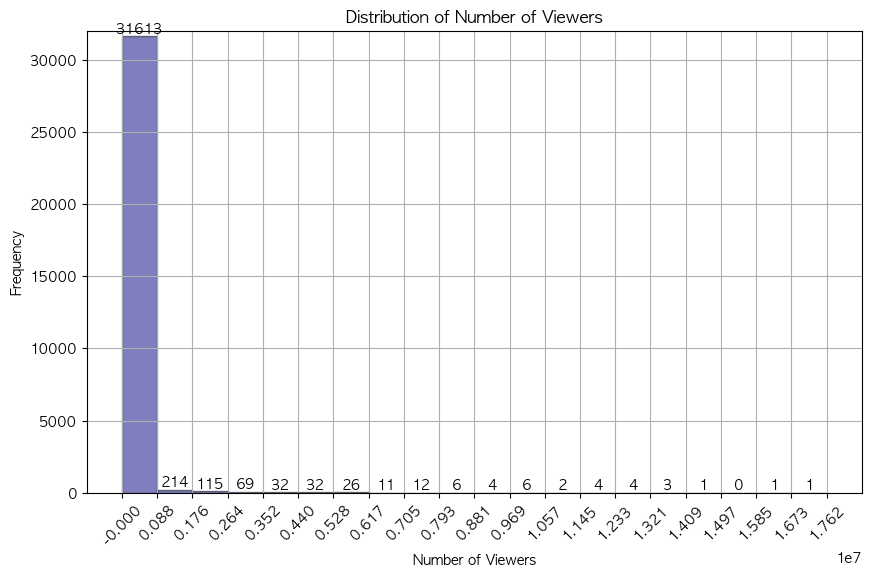

In [12]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data['관객수'], bins=20, color='navy', edgecolor='black', alpha=0.5)

plt.title('Distribution of Number of Viewers')
plt.xlabel('Number of Viewers')
plt.ylabel('Frequency')
plt.grid(True)
plt.ylim(0, 32000)

bin_centers = 0.5 * (bins[1:] + bins[:-1])
for count, x in zip(counts, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.xticks(bins, rotation=45)

plt.show()


##### KDE 그래프 그리기

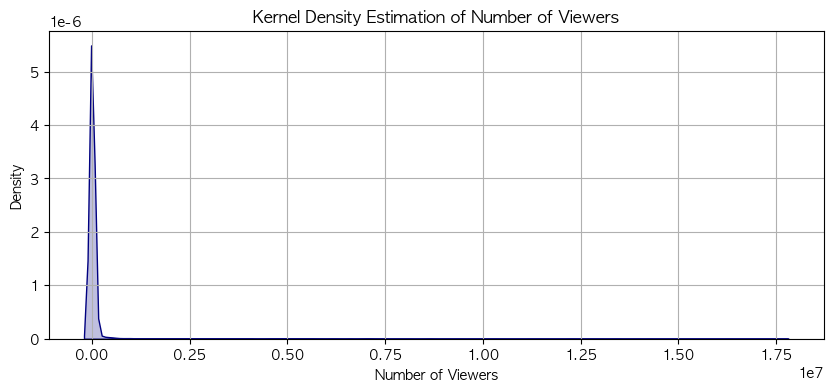

In [13]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data['관객수'], shade=True, color='navy')

plt.title('Kernel Density Estimation of Number of Viewers')
plt.xlabel('Number of Viewers')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### 3.3 Heatmap

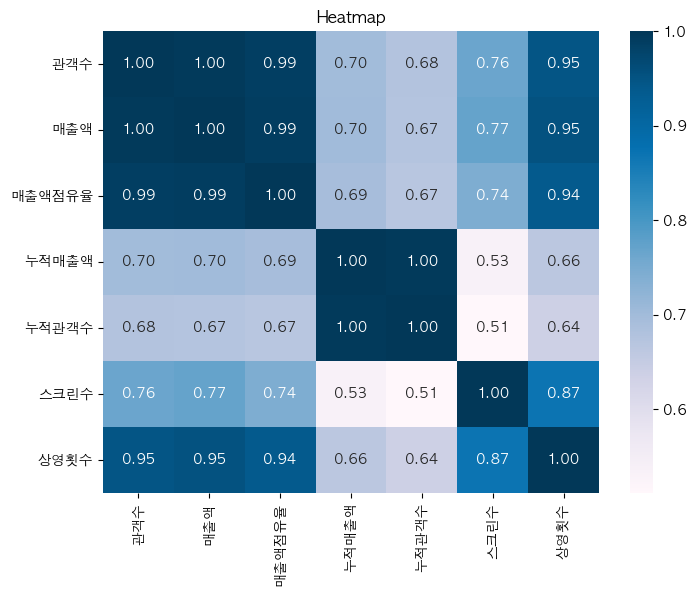

In [14]:
correlation_numerical = data[['관객수','매출액','매출액점유율','누적매출액','누적관객수','스크린수','상영횟수']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_numerical, annot=True, cmap='PuBu', fmt=".2f")
plt.title('Heatmap')
plt.show()

## 4. 데이터 전처리(Data Preprocessing)

전처리에 앞서 영화 산업의 제작 프로세스에 대해 말하자면,
1. 제작사가 영화를 기획해서 배급사에게 가져가 투자를 받고 계약을 한다.
2. 제작사는 영화를 제작한다.
3. 배급사는 완성된 영화를 상영할 상영관을 구매하고, 광고업체와 함께 마케팅을 진행한다.
4. 멀티플렉스 등에 들어가는 비용을 제외하고 영화상영을 통해 얻은 수익은 제작비용을 매꾸는데 사용된다.
5. 매출손익분기점을 넘게되면 제작사와 투자사가 수익을 나눠가진다.(계약에 따라 다름)

따라서 스크린수는 영화 제작이 완료된 후, 배급사에서 상영관을 구매하면서 정할 수 있는데

본 프로젝트는 영화 제작 전에 관객수를 예측하여 흥망성쇠를 판단하고, 관계자 측에 도움이 되고자 하는 것이기 때문에 스크린수는 제거하기로 하였다.

또한 프로젝트 진행 중 스크린 수와 관객수는 높은 상관관계를 가지면서 다른 독립변수들의 영향력이 줄어드는 것을 알 수 있었고 제거하기로 하였다.

대신 배급사의 간접적인 영향력(광고, 상영관 구매 등)도 무시할 수 없기에 기존과 다르게 배급사 컬럼도 추가하여 영향력(흥행력)을 파악하고자 하였다.

### 4.1 컬럼 수정

##### 불필요 컬럼 제거

In [15]:
data.drop('매출액', axis=1, inplace=True) #매출관련은 관객수랑 비례 관계이므로 중복으로 간주하고 제거
data.drop('매출액점유율', axis=1, inplace=True)
data.drop('누적매출액', axis=1, inplace=True)
data.drop('누적관객수', axis=1, inplace=True)
data.drop('상영횟수', axis=1, inplace=True)
data.drop('국적', axis=1, inplace=True) #대표국적으로 대체
data.drop('제작사', axis=1, inplace=True) #배급사와 동일하여 누락된 값이 많음
data.drop('스크린수', axis=1, inplace=True)

스크린수와 상영횟수 등등은 다중공산성 문제를 발생할 수 있음

##### 호환성을 위해 컬럼명을 한글에서 영어로 변환

In [16]:
data.rename(columns={'영화명': 'title'}, inplace=True)
data.rename(columns={'개봉일': 'release_date'}, inplace=True)
data.rename(columns={'관객수': 'box_off_num'}, inplace=True)
data.rename(columns={'대표국적': 'country'}, inplace=True)
data.rename(columns={'등급': 'screening_rat'}, inplace=True)
data.rename(columns={'장르': 'genre'}, inplace=True)
data.rename(columns={'배급사': 'distributor'}, inplace=True)
data.rename(columns={'감독': 'director'}, inplace=True)
data.rename(columns={'배우': 'actors'}, inplace=True)

##### 문자형 데이터에 띄어쓰기 없애주기

In [17]:
data['title'] = data['title'].str.replace(' ', '')
data['country'] = data['country'].str.replace(' ', '')
data['screening_rat'] = data['screening_rat'].str.replace(' ', '')
data['genre'] = data['genre'].str.replace(' ', '')
data['distributor'] = data['distributor'].str.replace(' ', '')
data['director'] = data['director'].str.replace(' ', '')
data['actors'] = data['actors'].str.replace(' ', '')

### 4.2 결측치(missing value) 처리

#### 4.2.1 결측치 확인

In [18]:
data.isna().sum()

title               30
release_date     13949
box_off_num          0
country            557
distributor      15323
screening_rat    13250
genre             1360
director          5534
actors           13161
dtype: int64

#### 4.2.2 결측치 시각화

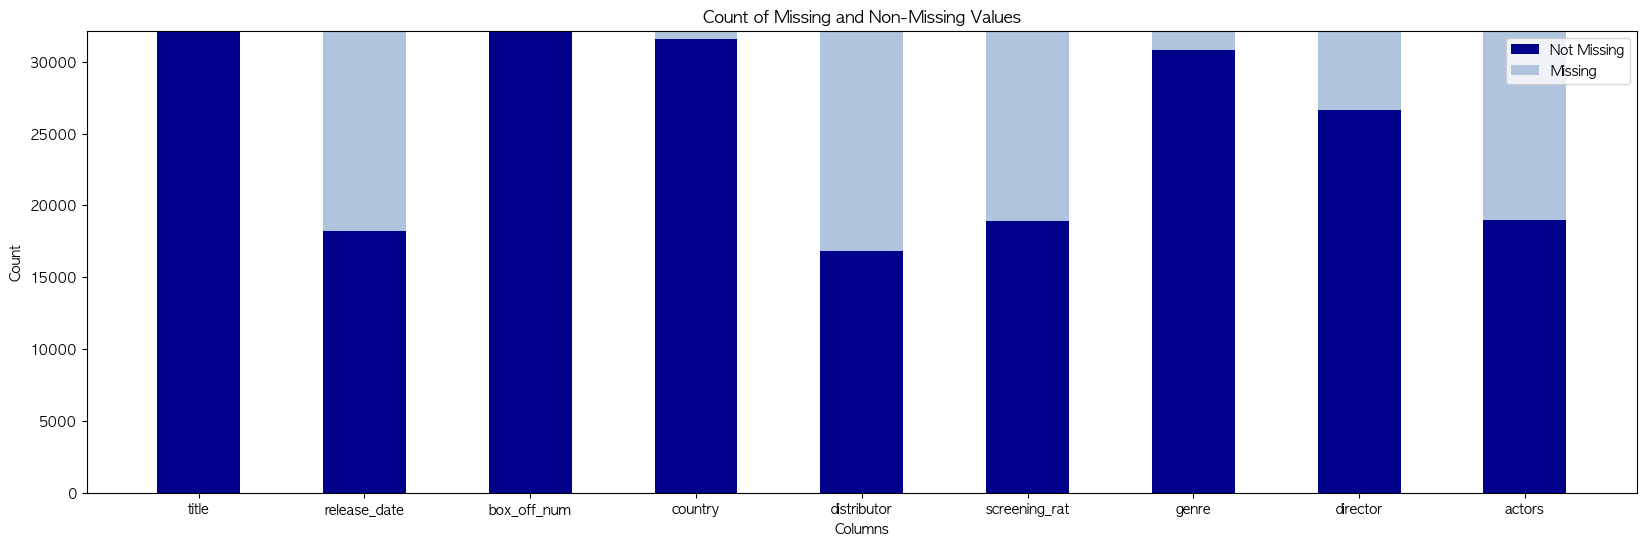

In [19]:
missing_count = data.isnull().sum()
non_missing_count = data.notnull().sum()

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.5
bar_positions = range(len(data.columns))

ax.bar(bar_positions, non_missing_count, bar_width, label='Not Missing', color='darkblue')

ax.bar(bar_positions, missing_count, bar_width, bottom=non_missing_count, label='Missing', color='lightsteelblue')

ax.set_xticks(bar_positions)
ax.set_xticklabels(data.columns)

ax.set_title('Count of Missing and Non-Missing Values')
ax.set_xlabel('Columns')
ax.set_ylabel('Count')
ax.legend()
plt.show()

#### 4.2.3 감독과 배우 결측치 존재하는 행 삭제

In [20]:
data = data.dropna(subset=['director', 'actors'])

감독의 흥행력, 배우의 흥행력을 영화 흥행의 주요한 요인이라 판단하였기 때문에 결측치는 제거하였다.
이후 다른 결측치는 컬럼별 전처리를 통해 할 예정임

### 4.3 이상치 처리

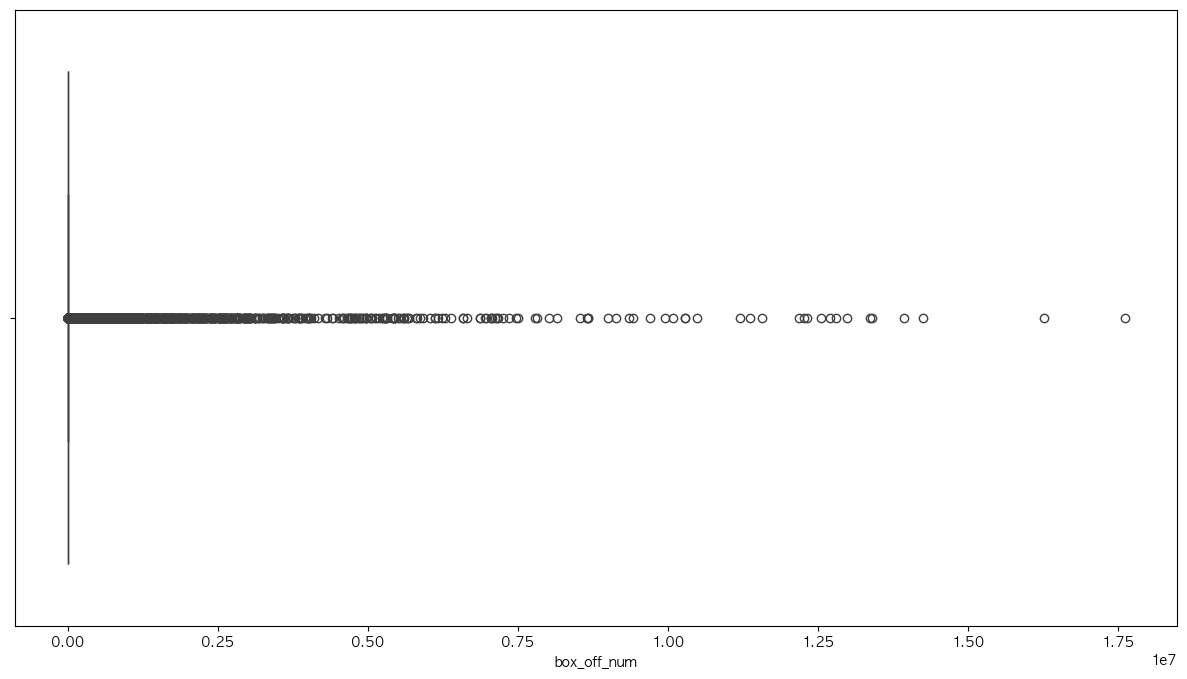

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "box_off_num",  orient = "v", data = data)
plt.show()

In [22]:
zero_rows = data[data['box_off_num'] == 0]
zero_rows

,title,release_date,box_off_num,country,distributor,screening_rat,genre,director,actors
30497,최종병기활,2011-08-10,0,한국,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"사극,액션",김한민,"박해일,류승룡,김무열,문채원,이한위,김구택,이경영,박기웅,이승준,이재구,박노식,이다..."
30498,트랜스포머:패자의역습,2009-06-24,0,미국,CJENM,12세이상관람가,"SF,액션,어드벤처",마이클베이,"샤이아라보프,메간폭스"
30499,은밀하게위대하게,2013-06-05,0,한국,(주)쇼박스,15세이상관람가,"액션,코미디,드라마",장철수,"김수현,박기웅,이현우,손현주,박혜숙,김성균,고창석,장광,신정근,홍경인,이채영,박은빈..."
30500,"좋은놈,나쁜놈,이상한놈",2008-07-17,0,한국,CJENM,15세이상관람가,"서부극(웨스턴),액션,어드벤처",김지운,"송강호,이병헌,정우성,오달수,엄지원,김광일,손병호,이청아,김선영,성정훈,송승현,신상..."
30501,다크나이트라이즈,2012-07-19,0,미국,워너브러더스코리아(주),15세이상관람가,"액션,범죄,스릴러",크리스토퍼놀란,"크리스찬베일,게리올드만,앤해서웨이,톰하디,조셉고든레빗"
...,...,...,...,...,...,...,...,...,...
32145,태어나기는했지만,NaT,0,일본,NaN,NaN,NaN,오즈야스지로,"요시카와미츠코,아오키토미오"
32146,파이판,2012-05-31,0,중국,(주)마노엔터테인먼트,전체관람가,"드라마,코미디",제이민,"이바오안,한후이량,런린,정즈위안"
32149,할머니의사랑,NaT,0,일본,NaN,NaN,드라마,나카에유지,"니시다나오미,무라카미준"
32152,헬라이드,2010-08-26,0,미국,NaN,청소년관람불가,"드라마,스릴러",래리비숍,마이클매드슨


종속변수인 box_off_num에 대한 boxplot에서 이상치로 판단할 수 있는 샘플이 다수 존재한다는 것을 확인할 수 있다. 일반적인 IQR 기준 이상치 제거 방식으로는 정보 손실이 많이 발생하게 된다. 또한, 사전에 큰 흥행을 할 수 있는 영화를 예측하는 것도 중요하기 때문에, 이상치 그 자체로도 중요한 정보를 포함하고 있다고 볼 수 있다. 따라서, 분석자의 판단에 따라 이상치를 제거하지 않기로 결정하였다

또한 이상치 처리를 하려는 도중, 저명한 영화인데 관객수가 0인 영화를 발견하였고, 확인 결과 영화가 정식 개봉이 아닌 시사회나 제한된 상영 형태로만 상영되어서 이때의 관객 수가 공식 데이터에 포함되지 않아 0으로 기록되었다는 것을 알 수 있었다

### 4.4 컬럼별(독립변수) 전처리

#### 4.4.1 title 전처리

##### 중복된 영화 제거

In [23]:
data = data.sort_values('box_off_num', ascending=False).drop_duplicates('title')

앞서 설명한 시사회나 제한된 상영 형태로 상영되어 데이터베이스 상 중복 기입이 된 영화를 삭제하였다

##### 결측치 확인

In [24]:
data['title'].isna().sum()

1

In [25]:
data = data.dropna(subset=['title'])

##### 감독판 영화 제거

In [26]:
data = data[~data['title'].str.contains('감독판')]

감독판 영화 확인 결과, 64개가 존재하였다

감독판의 경우 이전 버전의 흥행이 감독판 영화에 영향을 미친다고 판단하였고, 영화가 최초로 개봉했을 때의 관객 수를 예측하는 본 프로젝트의 목표와 맞지 않아 삭제하였다.

#### 4.4.2 release_date 전처리

##### 2010년~2019년 이외에 개봉한 영화 개수 확인

In [27]:
count_less_than_2010 = len(data[data['release_date'].dt.year < 2010])
count_less_than_2010

1766

In [28]:
count_more_than_2020 = len(data[data['release_date'].dt.year >= 2020])
count_more_than_2020

94

In [29]:
data = data[(data['release_date'].dt.year >= 2010) & (data['release_date'].dt.year < 2020)]

재개봉 및 데이터베이스 기입 상의 오류로 인해 본 프로젝트 범위(2010년~2019년)와 맞지 않는 범위는 삭제하였다

##### release_date를 season별로 범주화

In [30]:
data['release_date'] = pd.to_datetime(data['release_date'])

def get_season(date):
    if date.month in [3, 4, 5]:
        return 'spring'
    elif date.month in [6, 7, 8]:
        return 'summer'
    elif date.month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'winter'

data['season'] = data['release_date'].apply(get_season)

##### season 별 평균 관객수 시각화

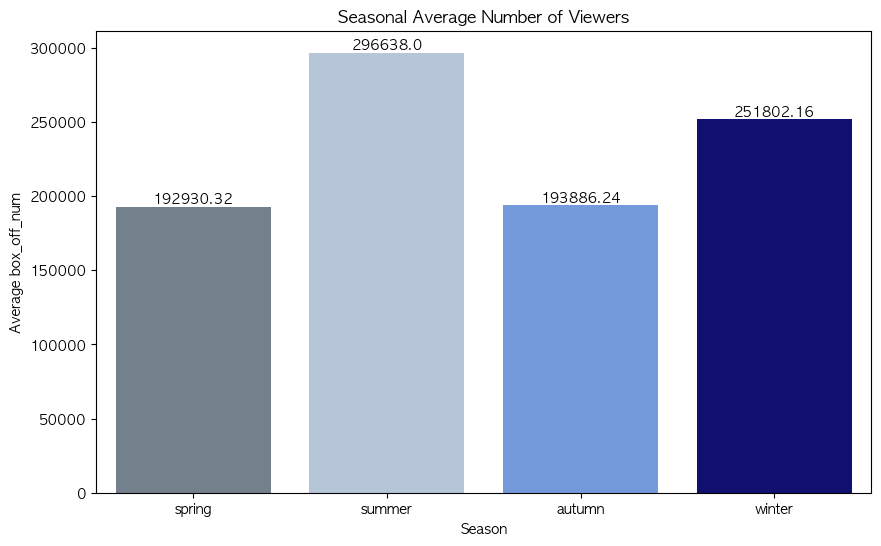

In [31]:
season_avg = data.groupby('season')['box_off_num'].mean()

season_order = ['spring', 'summer', 'autumn', 'winter']
season_avg = season_avg.reindex(season_order)

plt.figure(figsize=(10, 6))

colors = ['slategray', 'lightsteelblue', 'cornflowerblue', 'navy']

bars = sns.barplot(x=season_avg.index, y=season_avg.values, palette=colors)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center', va='bottom')
    
plt.title('Seasonal Average Number of Viewers')
plt.xlabel('Season')
plt.ylabel('Average box_off_num')
plt.show()


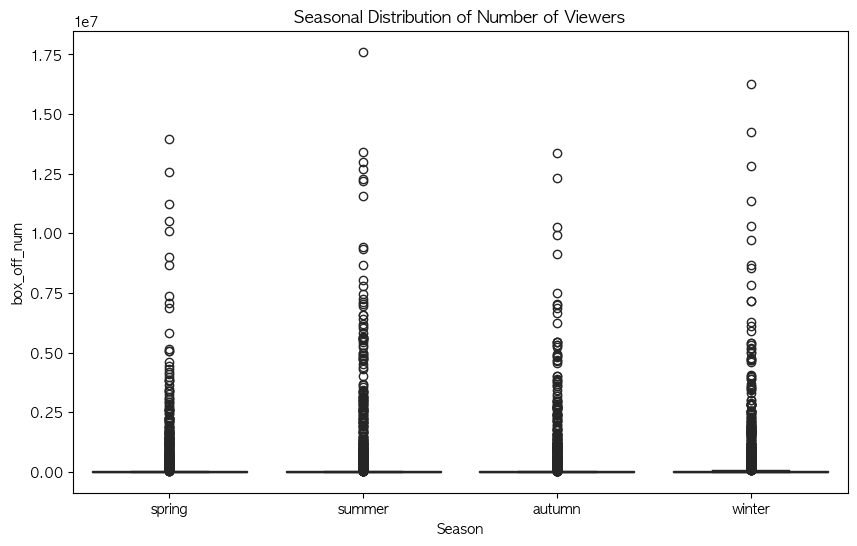

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='box_off_num', data=data, order=season_order, palette=colors)
plt.title('Seasonal Distribution of Number of Viewers')
plt.xlabel('Season')
plt.ylabel('box_off_num')
plt.show()

#### 4.4.3 country 전처리

##### 결측값 개수 확인

In [33]:
data['country'].isnull().sum()

0

원래 결측값이 557개였는데, 위에서 결측값을 처리하면서 사라짐

##### grouping 전 country 변수 시각화(Top 20)

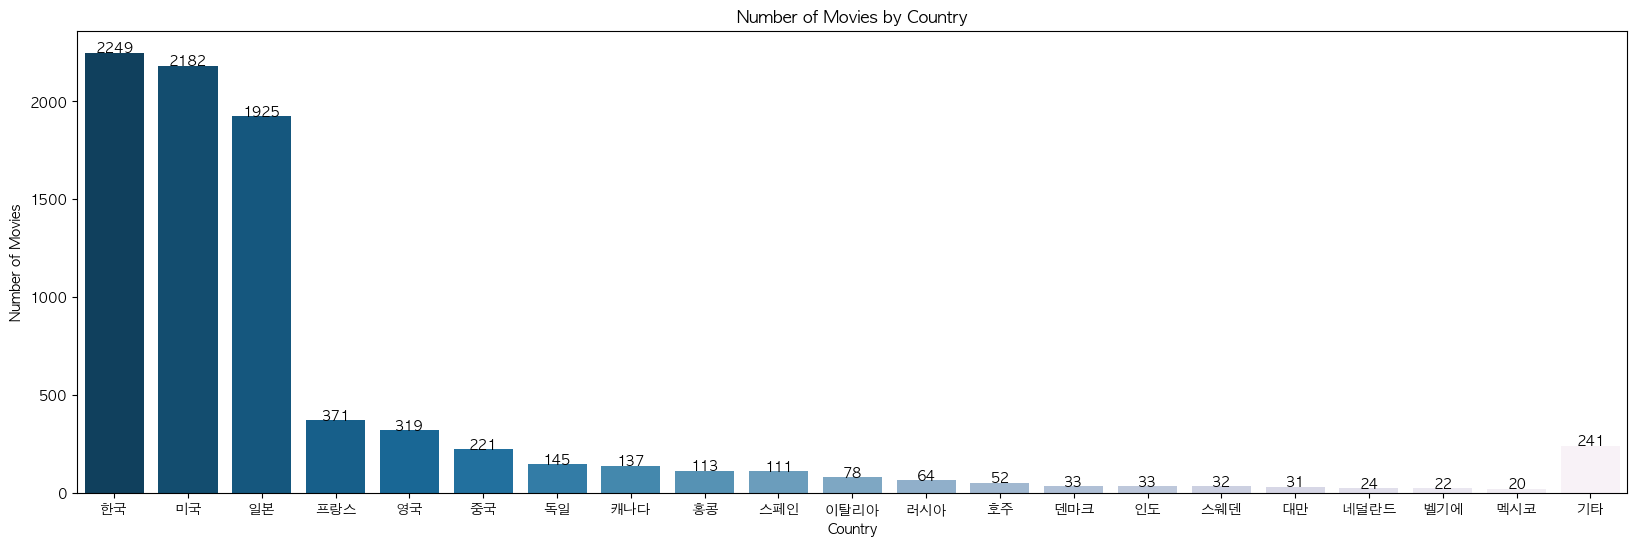

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

data_copy = data.copy()

country_counts = data_copy['country'].value_counts()
top_20_countries = country_counts.nlargest(20).index
data_copy['country'] = data_copy['country'].apply(lambda x: x if x in top_20_countries else '기타')
country_counts = data_copy['country'].value_counts()

country_counts = country_counts.sort_values(ascending=False)
if '기타' in country_counts:
    other_count = country_counts['기타']
    country_counts = country_counts[country_counts.index != '기타']
    country_counts['기타'] = other_count

palette = sns.color_palette("PuBu", len(country_counts))[::-1]

plt.figure(figsize=(20, 6))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, palette=palette)
plt.title('Number of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')

for i, count in enumerate(country_counts):
    ax.text(i, count + 0.5, str(count), ha='center', color='black')

plt.show()

##### country 종류 확인

In [35]:
unique_country = data['country'].unique()
print(unique_country)

['한국' '미국' '일본' '영국' '프랑스' '벨기에' '독일' '아이슬란드' '스페인' '아일랜드' '남아프리카공화국' '중국'
 '인도' '대만' '핀란드' '러시아' '홍콩' '스웨덴' '이탈리아' '호주' '덴마크' '캐나다' '기타' '아르헨티나'
 '태국' '노르웨이' '오스트리아' '터키' '멕시코' '뉴질랜드' '그리스' '폴란드' '칠레' '체코' '헝가리' '말레이시아'
 '인도네시아' '네덜란드' '브라질' '이란' '우크라이나' '싱가포르' '루마니아' '베트남' '포르투갈' '팔레스타인'
 '에스토니아' '이스라엘' '아랍에미리트연합국정부' '몽고' '불가리아' '부탄' '콜롬비아' '이라크' '크로아티아'
 '베네수엘라' '스위스' '카자흐스탄' '우루과이' '슬로바키아' '세르비아' '필리핀' '모로코' '페루']


종류가 상당히 많은 것을 알 수 있었다.

In [36]:
from collections import Counter

country_counts = Counter(data['country'])
sorted_country_counts = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)
for country, count in sorted_country_counts:
    print(f"{country}: {count}")

한국: 2249
미국: 2182
일본: 1925
프랑스: 371
영국: 319
중국: 221
독일: 145
캐나다: 137
홍콩: 113
스페인: 111
이탈리아: 78
러시아: 64
호주: 52
인도: 33
덴마크: 33
스웨덴: 32
대만: 31
네덜란드: 24
벨기에: 22
아일랜드: 20
멕시코: 20
태국: 19
노르웨이: 19
아르헨티나: 14
핀란드: 12
아이슬란드: 11
오스트리아: 11
뉴질랜드: 9
헝가리: 9
이스라엘: 9
말레이시아: 8
브라질: 8
기타: 7
인도네시아: 7
터키: 6
이란: 6
폴란드: 5
칠레: 5
체코: 5
베트남: 5
그리스: 4
루마니아: 4
카자흐스탄: 4
싱가포르: 3
크로아티아: 3
스위스: 3
남아프리카공화국: 2
우크라이나: 2
팔레스타인: 2
아랍에미리트연합국정부: 2
콜롬비아: 2
이라크: 2
세르비아: 2
포르투갈: 1
에스토니아: 1
몽고: 1
불가리아: 1
부탄: 1
베네수엘라: 1
우루과이: 1
슬로바키아: 1
필리핀: 1
모로코: 1
페루: 1


##### country grouping

In [37]:
def group_country(country):
    if country in ['미국', '캐나다','멕시코']:
        return '북중미'
    elif country == '한국':
        return '한국'
    elif country == '일본':
        return '일본'
    elif country in ['중국', '홍콩', '대만']:
        return '중화권'
    elif country in ['프랑스', '영국', '독일','스페인','이탈리아','덴마크', '스웨덴', '네덜란드', '벨기에', 
                     '아일랜드', '노르웨이', ',아르헨티나', ',핀란드', '오스트리아', '아이슬란드', '헝가리']:
        return '유럽'
    # elif country in ['인도']:
    #     return '인도'
    # elif country in ['러시아']:
    #     return '러시아'
    # elif country in ['호주']:
    #     return '호주'
    else:
        return '기타'

In [38]:
data['country'] = data['country'].apply(group_country)

기타를 포함한 6개의 범주로 나누었다.

##### country 시각화

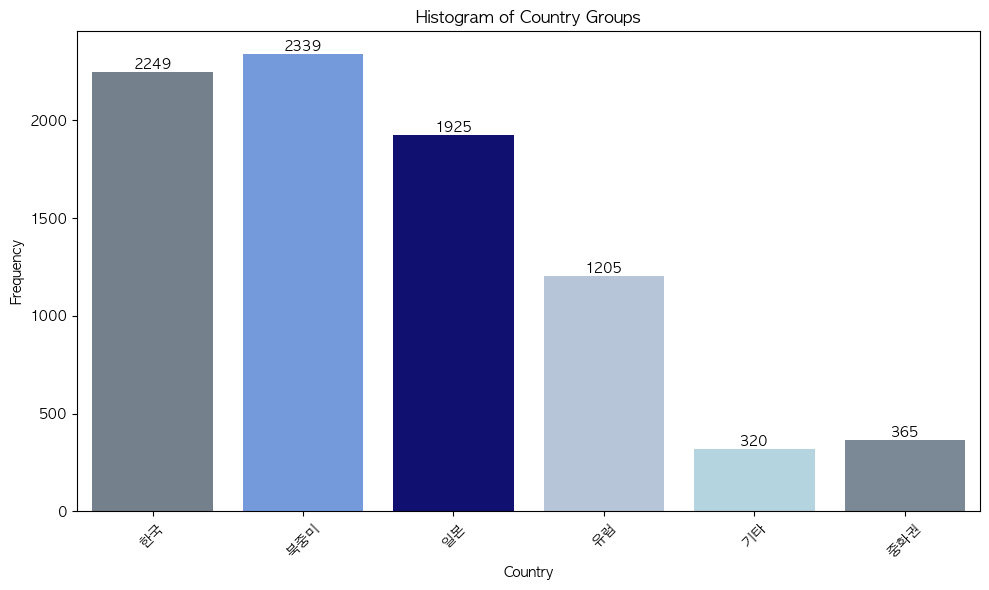

In [39]:
plt.figure(figsize=(10, 6))
colors = ['slategray', 'cornflowerblue', 'navy', 'lightsteelblue', 'lightblue', 'lightslategray', 'royalblue']

sns.countplot(data=data, x='country', palette=colors)
plt.title('Histogram of Country Groups')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


##### country boxplot

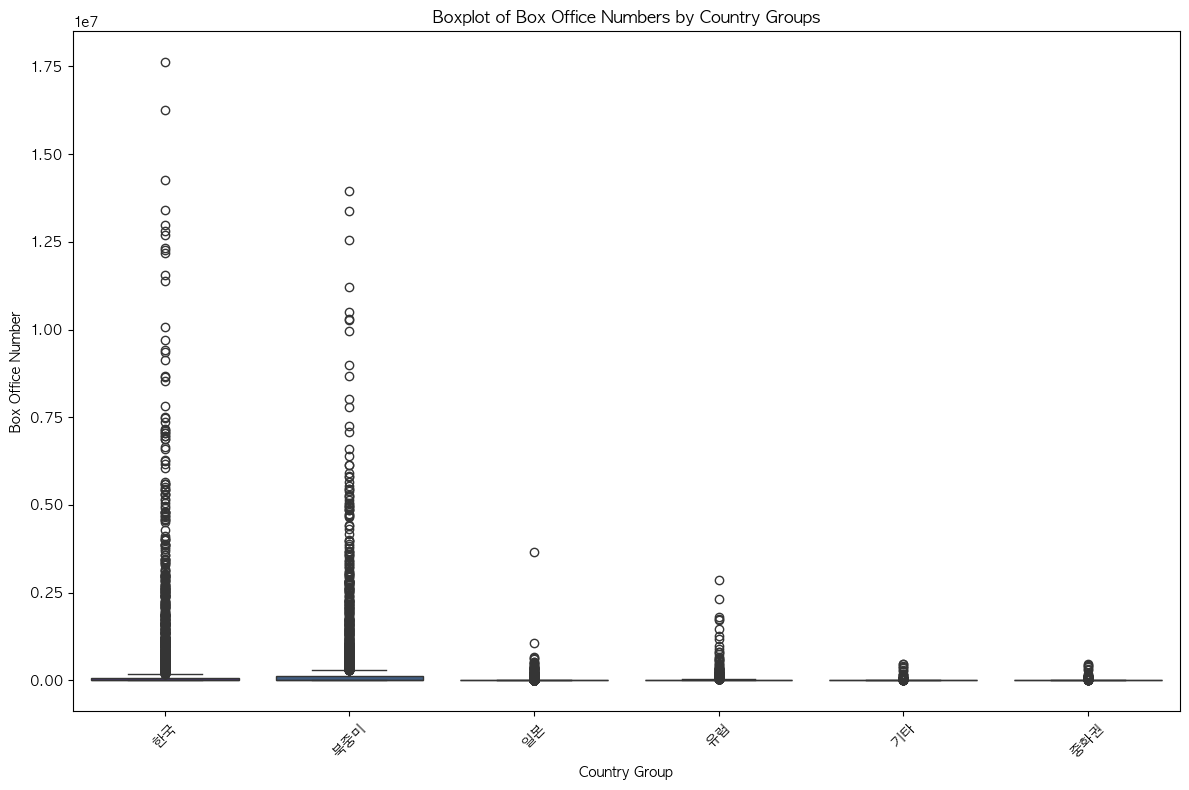

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='country', y='box_off_num', palette='viridis')
plt.title('Boxplot of Box Office Numbers by Country Groups')
plt.xlabel('Country Group')
plt.ylabel('Box Office Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.4.4 genre 전처리

##### 결측값 개수 확인

In [41]:
data['genre'].isnull().sum()

23

##### 결측값 기타로 대체

In [42]:
data['genre'].fillna('기타', inplace=True)
data['genre'].isnull().sum()

0

##### 장르 열에서 쉼표로 분리하여, 첫번째 장르를 대표 장르로 선택

In [43]:
data['genre'] = data['genre'].str.split(',').str[0]

##### 장르 종류 확인

In [44]:
unique_genre = data['genre'].unique()
print(unique_genre)

['사극' '코미디' '드라마' '액션' '애니메이션' '어드벤처' '판타지' 'SF' '범죄' '전쟁' '미스터리' '멜로/로맨스'
 '스릴러' '다큐멘터리' '공포(호러)' '뮤지컬' '가족' '기타' '서부극(웨스턴)' '성인물(에로)' '공연']


##### 장르별 평균 관객수 및 영화 개수 확인

In [45]:
genre_counts = data['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

genre_avg = data.groupby('genre')['box_off_num'].mean().reset_index()
genre_avg_sorted = genre_avg.sort_values(by='box_off_num', ascending=False)

merged_genre = pd.merge(genre_avg_sorted, genre_counts, on='genre')
merged_genre

,genre,box_off_num,count
0,사극,2.826092e+06,39
1,어드벤처,9.105322e+05,71
2,범죄,5.904985e+05,245
3,액션,5.482905e+05,1070
4,판타지,4.411001e+05,112
5,SF,3.252511e+05,172
6,애니메이션,3.192552e+05,560
7,미스터리,2.899766e+05,148
8,코미디,2.732127e+05,584
9,전쟁,2.229795e+05,57


##### 장르 통합

In [46]:
data.loc[data['genre'] == '가족', 'genre'] = '드라마'
data.loc[data['genre'] == '공연', 'genre'] = '뮤지컬'
data.loc[data['genre'] == '서부극(웨스턴)', 'genre'] = '액션'
data.loc[data['genre'] == '전쟁', 'genre'] = '사극'
data.loc[data['genre'] == '스릴러', 'genre'] = '공포(호러)'

data['genre'].replace('멜로/로맨스', '로맨스', inplace=True)
data['genre'].replace('공포(호러)', '공포', inplace=True)
data['genre'].replace('뮤지컬', '예술', inplace=True)
data['genre'].replace('사극', '역사/전쟁', inplace=True)

In [47]:
data = data[data['genre'] != '성인물(에로)']
data = data[data['genre'] != '기타']

상대적으로 평균 관객수가 적거나 의미가 공통된 가족, 공연, 서부극(웨스턴) 등을 다른 공통된 장르와 통합하였다

'사극'은 빈도 수는 적지만 평균관객수가 가장 높으므로 제거하지 않았다.

'성인물(에로)'는 일반적으로 영화의 주요 장르로 간주되지 않고, 빈도수는 높으나 평균관객수는 제일 낮으므로 의미가 없다고 판단하여 삭제하였다.

마찬가지로 '기타' 장르도 삭제하였다

##### + 최종발표 이후 보완사항을 바탕으로 '장르' 컬럼 전처리 할 시

In [48]:
# data = data[~data['genre'].str.contains('성인물|기타')]

# all_genres = set()
# for genres in data['genre']:
#     all_genres.update(genres.split(','))

# for genre in all_genres:
#     data['genre_' + genre] = data['genre'].apply(lambda x: 1 if genre in x.split(',') else 0)

기존에는 쉼표를 기준으로 첫 번째 장르를 대표 장르로 부여하였지만,

장르 컬럼에 기재된 모든 장르가 이진 형태로 나타나도록 변경해보았다.

##### genre별 영화 개수 histogram

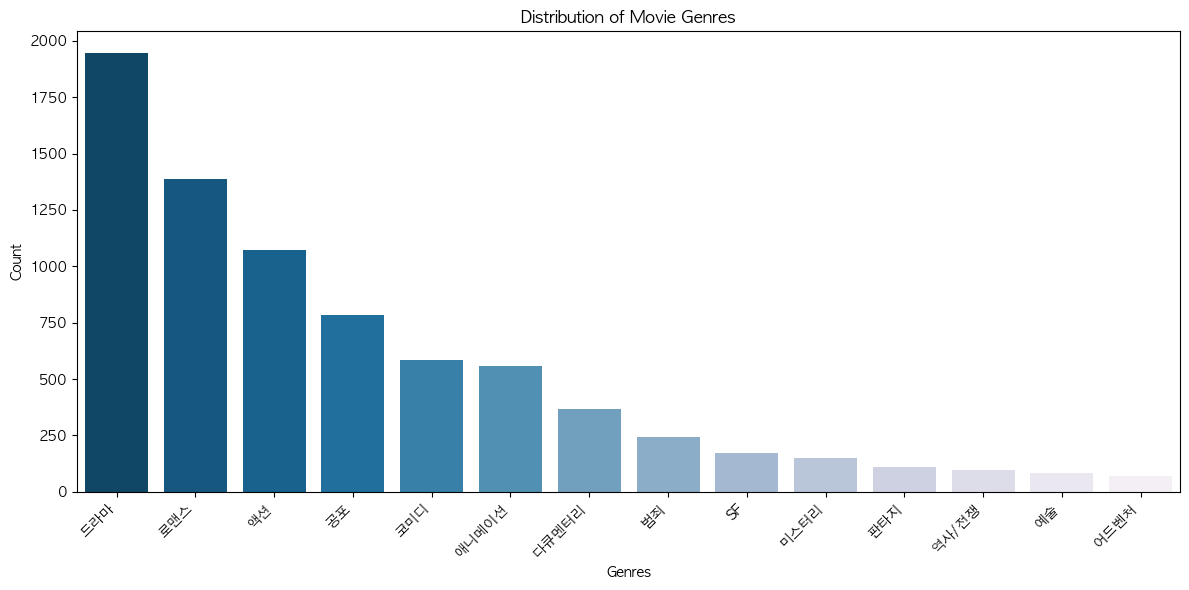

In [49]:
genre_counts = data['genre'].value_counts()

palette = sns.color_palette("PuBu", len(genre_counts))[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=palette)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### genre별 평균 관객수 histogram

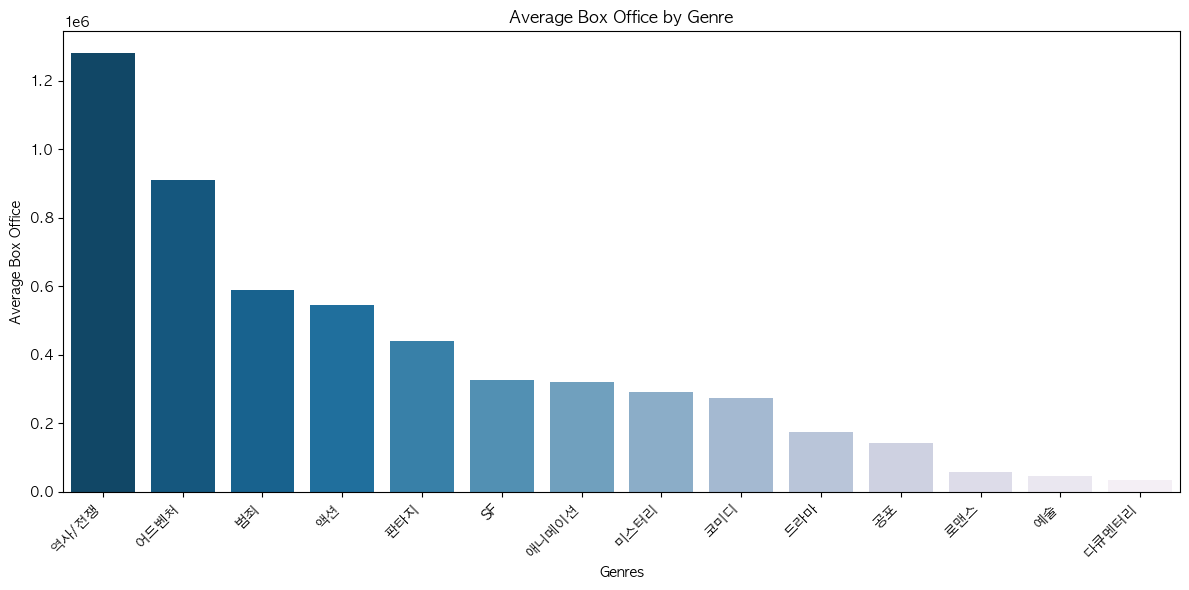

In [50]:
genre_box_office = data.groupby('genre')['box_off_num'].mean().sort_values(ascending=False)

palette = sns.color_palette("PuBu", len(genre_counts))[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_box_office.index, y=genre_box_office.values, palette=palette)
plt.title('Average Box Office by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Box Office')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4.4.5 screening_rat 전처리

##### 결측치 확인

In [51]:
data['screening_rat'].isnull().sum()

5

결측치 '기타' 등급으로 대체

In [52]:
data['screening_rat'].fillna('기타', inplace=True)
data['screening_rat'].isnull().sum()

0

##### 상영등급 종류 확인

In [53]:
unique_screening_rat = data['screening_rat'].unique()
print(unique_screening_rat)

['15세이상관람가' '12세이상관람가' '전체관람가' '청소년관람불가' '청소년관람불가,15세이상관람가'
 '12세이상관람가,15세이상관람가' '12세이상관람가,전체관람가' '15세이상관람가,전체관람가' '15세관람가' '기타'
 '15세관람가,12세이상관람가']


##### 콤마 기준 앞의 상영등급 선택

In [54]:
data['screening_rat'] = data['screening_rat'].str.split(',').str[0]

##### 상영등급 통합하기

앞서 데이터 탐색을 했을 때 상영등급의 종류는 아래와 같이 공통된 의미기 존재하였다.

['15세이상관람가' '12세이상관람가' '전체관람가' '청소년관람불가' '청소년관람불가,15세이상관람가'
 '15세미만인자는관람할수없는등급,15세이상관람가' '15세관람가' '15세관람가,15세이상관람가' '연소자관람가,전체관람가'
 '15세관람가,12세이상관람가' '모든관람객이관람할수있는등급,전체관람가' '12세관람가' '12세이상관람가,연소자관람가'
 '고등학생이상관람가,15세이상관람가' '연소자관람불가,청소년관람불가' '12세이상관람가,중학생이상관람가' nan
 '12세이상관람가,연소자관람가,전체관람가' '12세이상관람가,12세관람가' '18세관람가,청소년관람불가'
 '15세미만인자는관람할수없는등급' '18세관람가' '12세미만인자는관람할수없는등급' '연소자관람불가,15세이상관람가'
 '국민학생관람불가,청소년관람불가' '18세관람가,15세이상관람가' '15세이상관람가,중학생이상관람가'
 '12세이상관람가,15세이상관람가' '고등학생이상관람가' '12세이상관람가,15세미만인자는관람할수없는등급'
 '15세이상관람가,18세미만인자는관람할수없는등급' '12세이상관람가,전체관람가' '중학생이상관람가'
 '12세이상관람가,국민학생관람불가,15세이상관람가' '청소년관람불가,고등학생이상관람가' '연소자관람불가' '연소자관람가'
 '국민학생관람불가,15세이상관람가' '12세이상관람가,국민학생관람불가' '미정' '청소년관람불가,전체관람가' '국민학생관람불가'
 '18세미만인자는관람할수없는등급' '미성년자관람불가' '청소년관람불가,12세관람가' '미성년자관람가'
 '연소자관람가,15세이상관람가' '모든관람객이관람할수있는등급' '15세이상관람가,전체관람가' '기타'
 '15세이상관람가,미성년자관람불가' '12세이상관람가,고등학생이상관람가' '고등학생이상관람가,청소년관람불가']

이를 토대로 [만15세이상관람가' '만12세이상관람가' '전체관람가' '만18세이상관람가' '기타']로 나누었다

In [55]:
def get_dis(x) :
    if '12세이상관람가' in x or '12세관람가' in x or '12세미만인자는관람할수없는등급' in x or '국민학생관람불가' in x :
        return '만12세이상관람가'
    elif '15세이상관람가' in x or '15세관람가' in x :
        return '만15세이상관람가'
    elif '18' in x or '청소년관람불가' in x or '15세미만인자는관람할수없는등급' in x or '고등학생이상관람가' in x or '연소자관람불가' in x or '18세관람가' in x or '미성년자관람불가' in x:
        return '만18세이상관람가'
    elif '전체관람가' in x or '모든관람객이관람할수있는등급' in x or '연소자관람가' in x:
        return '전체관람가'
    elif '' in x or '미정' in x or '기타' in x:
        return '기타'
    else :
        return '기타'

data['screening_rat'] = data.screening_rat.apply(get_dis)

In [56]:
unique_screening_rat = data['screening_rat'].unique()
print(unique_screening_rat)

['만15세이상관람가' '만12세이상관람가' '전체관람가' '만18세이상관람가' '기타']


##### '기타' 상영등급 개수 확인

In [57]:
count_miscellaneous = (data['screening_rat'] == '기타').sum()
print("기타로 표시된 상영등급의 개수:", count_miscellaneous)

기타로 표시된 상영등급의 개수: 5


In [58]:
data[data['screening_rat'] == '기타']

,title,release_date,box_off_num,country,distributor,screening_rat,genre,director,actors,season
11181,미남세르쥬,2010-12-14,183,유럽,NaN,기타,드라마,클로드샤브롤,"에드몽뷰챙,제랄드블랑",winter
11841,지옥,2010-12-14,159,유럽,해피송,기타,범죄,클로드샤브롤,"엠마누엘베아르,프랑수아클뤼제,안드레윔즈",winter
12996,마스크,2010-12-14,127,유럽,NaN,기타,코미디,클로드샤브롤,"필립느와레,로빈레누치",winter
21003,거짓의,2011-02-18,29,유럽,NaN,기타,드라마,오슨웰즈,오슨웰즈,winter
28367,좀비vs헌터,2018-01-11,1,북중미,(주)고맙습니다사랑합니다,기타,액션,K.킹,"마틴코핑,대니트레조",winter


##### 상영등급이 '기타'인 데이터 삭제

In [59]:
data = data[data['screening_rat'] != '기타']

##### 줄어든 상영등급 종류와 개수 확인

In [60]:
screening_rat_counts = data['screening_rat'].value_counts()

In [61]:
screening_rat_counts

screening_rat
만18세이상관람가    2978
만15세이상관람가    2405
만12세이상관람가    1276
전체관람가         963
Name: count, dtype: int64

##### 상영등급 별 관객수 histogram

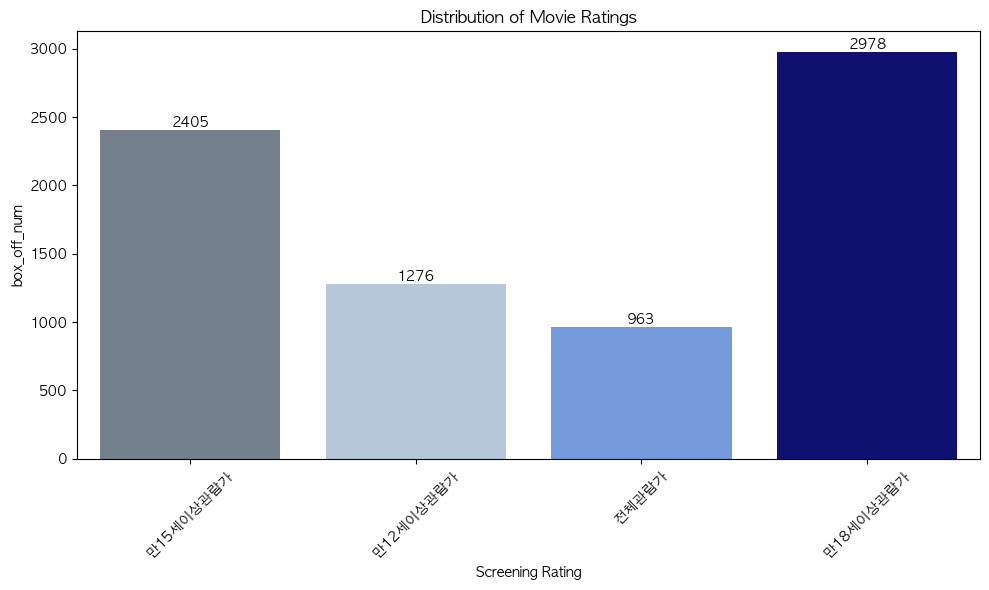

In [62]:
plt.figure(figsize=(10, 6))
colors = ['slategray', 'lightsteelblue', 'cornflowerblue', 'navy']

sns.countplot(data=data, x='screening_rat', palette=colors)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Screening Rating')
plt.ylabel('box_off_num')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


##### 상영등급별 관객수 boxplot

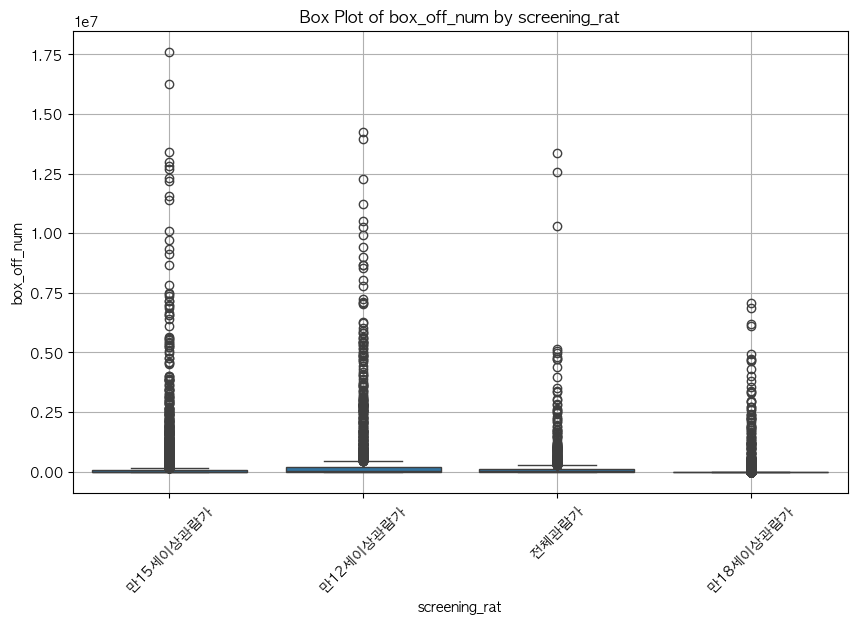

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='screening_rat', y='box_off_num', data=data)
plt.title('Box Plot of box_off_num by screening_rat')
plt.xlabel('screening_rat')
plt.ylabel('box_off_num')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 4.4.6 distributor 전처리

In [64]:
data['distributor'].isnull().sum()

15

In [65]:
data = data.dropna(subset=['distributor'])

##### 배급사 컬럼에서 콤마 기준으로 앞에 있는 데이터만 남기기

In [66]:
data['distributor'] = data['distributor'].str.split(',').str[0].str.strip()

##### 배급사 명에서 기호 없애주기

In [67]:
data['distributor'] = data.distributor.str.replace("(주)", '')
data['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in data.distributor]

In [68]:
unique_distributor = data['distributor'].unique()
print(unique_distributor)

['씨제이이엔엠' '월트디즈니컴퍼니코리아유한책임회사' '쇼박스' '넥스트엔터테인먼트월드NEW' '롯데컬처웍스롯데엔터테인먼트'
 '워너브러더스코리아' '소니픽쳐스릴리징월트디즈니스튜디오스코리아' '롯데쇼핑롯데엔터테인먼트'
 '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점' '이십세기폭스코리아' '플러스엠엔터테인먼트' 'CJENM'
 '유니버설픽쳐스인터내셔널코리아유' '디스테이션' '월트디즈니컴퍼니코리아' '한국소니픽쳐스릴리징브에나비스타영화' 'CGV아트하우스'
 '와우픽쳐스' '판씨네마' '에이스메이커무비웍스' '스튜디오디에이치엘' '아이러브시네마' '인벤트스톤' '필라멘트픽쳐스'
 '오퍼스픽쳐스유' '싸이더스' '씨네그루다우기술' '메리크리스마스' '제이앤씨미디어그룹' '씨너스엔터테인먼트' '영화사그램'
 '주식회사해리슨앤컴퍼니' '워터홀컴퍼니' '에스케이플래닛' '에스케이텔레콤' '키다리이엔티' '시너지하우스시너지' '시네마서비스'
 '와이드릴리즈' '에스비에스콘텐츠허브' '스마일이엔티' '화앤담이엔티' '에이썸엔터테인먼트' '글뫼주식회사' '리틀빅픽쳐스'
 '피터팬픽쳐스' '올스타엔터테인먼트' '미디어데이' '에이원엔터테인먼트' '유나이티드픽처스' '주식회사우리네트웍스'
 '나이너스엔터테인먼트' '이수CE' '엣나인필름' 'TCO더콘텐츠온' '영화사올' '콘텐츠지오' '주식회사마운틴픽쳐스'
 '마인스엔터테인먼트' '오드' '케이디미디어' '씨제이씨지브이CJCGV' '팝엔터테인먼트' '주식회사더쿱' '프레인글로벌'
 '삼백상회' '타임스토리그룹' '박수엔터테인먼트' '팝파트너스' '예지림엔터테인먼트' '재CBS' '누리픽쳐스' '영화사빅'
 '홈초이스' '코리아스크린' '그노스' '까멜리아이엔티' '프라임엔터테인먼트' '모멘텀엔터테인먼트' '티캐스트' '길갈'
 '셀트리온엔터테인먼트' '대명문화공장' '화천공사' '스폰지이엔티' '영화사진진' '그린나래미디어' '투니버스온미디어' '찬란'
 '콘텐츠판다' '성원아이컴' '유영화사화수분' '커넥트픽쳐스' 'KTG상

##### 배급사 통합

In [69]:
def get_dis(x) :
    if 'CJENM' in x or '씨제이씨지브이CJCGV' in x or '씨제이이엔엠' in x or 'CGV아트하우스' in x:
        return 'CJENM'
    elif '롯데컬처웍스롯데엔터테인먼트' in x or '롯데쇼핑롯데엔터테인먼트' in x or '롯데쇼핑롯데시네마' in x: 
        return '롯데엔터테인먼트'
    elif '쇼박스' in x: 
        return '쇼박스'
    elif '넥스트엔터테인먼트월드NEW' in x or '콘텐츠판다' in x: 
        return 'NEW'
    elif '플러스엠엔터테인먼트' in x or '메가박스' in x: 
        return '플러스엠'
    elif '에스케이플래닛' in x or '에스케이텔레콤' in x: 
        return 'SK'
    
    elif '월트디즈니컴퍼니코리아유한책임회사' in x or '월트디즈니컴퍼니코리아' in x: 
        return 'Disney'
    elif '소니픽쳐스릴리징월트디즈니스튜디오스코리아' in x or '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점' in x or '한국소니픽쳐스릴리징브에나비스타영화' in x:
        return '소니'
    elif '유니버설픽쳐스인터내셔널코리아유' in x :
        return 'UPI'
    
    else :
        return x
    
data['distributor'] = data.distributor.apply(get_dis)

##### 배급사 흥행력 계산

In [70]:
dist_power = data.groupby('distributor').agg({'box_off_num':'sum', 'title': 'count'})
dist_power['dist_power'] = dist_power['box_off_num'] / dist_power['title']

dist_power.columns = ['dist_box_off_num_sum', 'dist_movie_num', 'dist_power']

dist_power = dist_power.sort_values(by='dist_power', ascending=False)

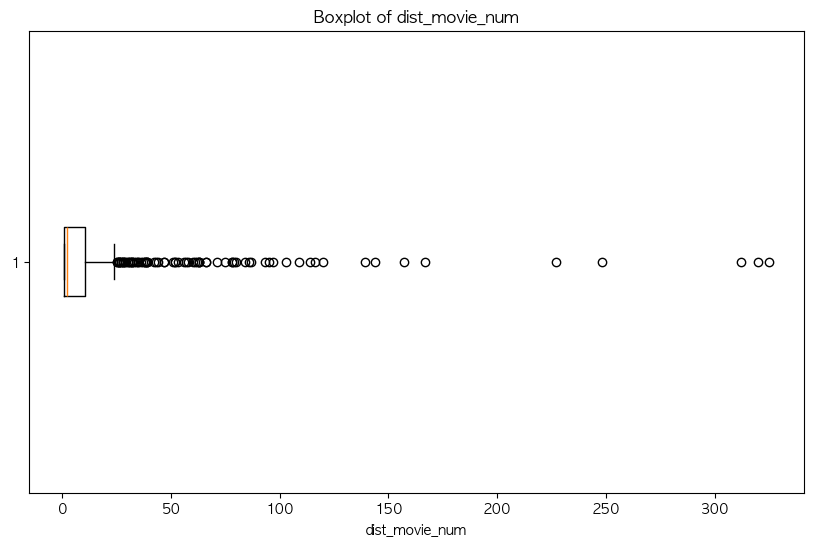

In [71]:
plt.figure(figsize=(10, 6))
plt.boxplot(dist_power['dist_movie_num'], vert=False)
plt.title('Boxplot of dist_movie_num')
plt.xlabel('dist_movie_num')
plt.show()

작품횟수가 200개가 넘어가는 배급사들은 확인 결과 디즈니, 롯데 같은 대형배급사여서 따로 삭제하지 않고 가중치를 계산하였다.

##### 가중치가 부여된 배급사의 흥행력 계산

In [72]:
max_dist_movie_num = dist_power['dist_movie_num'].max()

dist_power['dist_power_weighted'] = dist_power.apply(
    lambda row: row['dist_power'] * (row['dist_movie_num'] / max_dist_movie_num) if row['dist_movie_num'] > 0 else None,
axis=1
)
dist_power = dist_power.sort_values(by='dist_power_weighted', ascending=False)

배급사의 작품 횟수를 바탕으로 가중치를 계산하였다.

##### dist_power 파일 저장 및 데이터에 병합

In [73]:
dist_power.to_excel('/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/calculated_power_data/dist_power.xlsx')

dist_power = dist_power.reset_index()

data = pd.merge(data, dist_power[['distributor', 'dist_power', 'dist_power_weighted']], on='distributor', how='left')

In [74]:
data['dist_power_weighted'].isnull().sum()

0

##### 배급사 파워 histogram

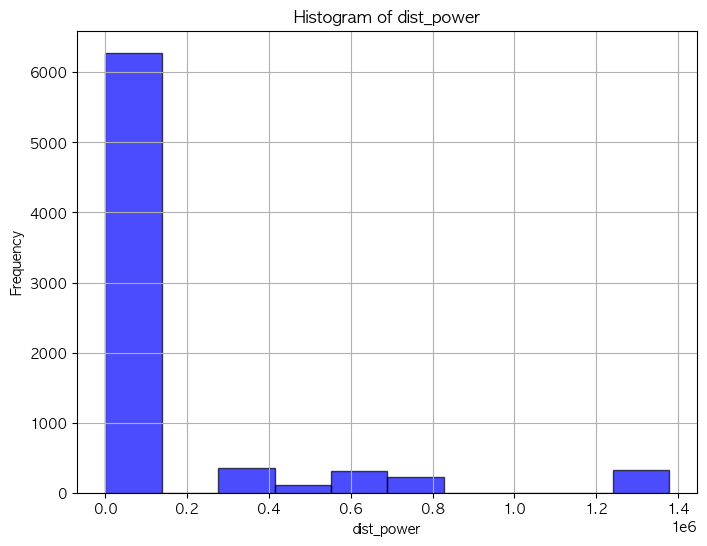

In [75]:
plt.figure(figsize=(8, 6))

palette = sns.color_palette("PuBu", len(genre_counts))[::-1]

plt.hist(data['dist_power_weighted'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of dist_power')
plt.xlabel('dist_power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 배급사 파워 boxplot

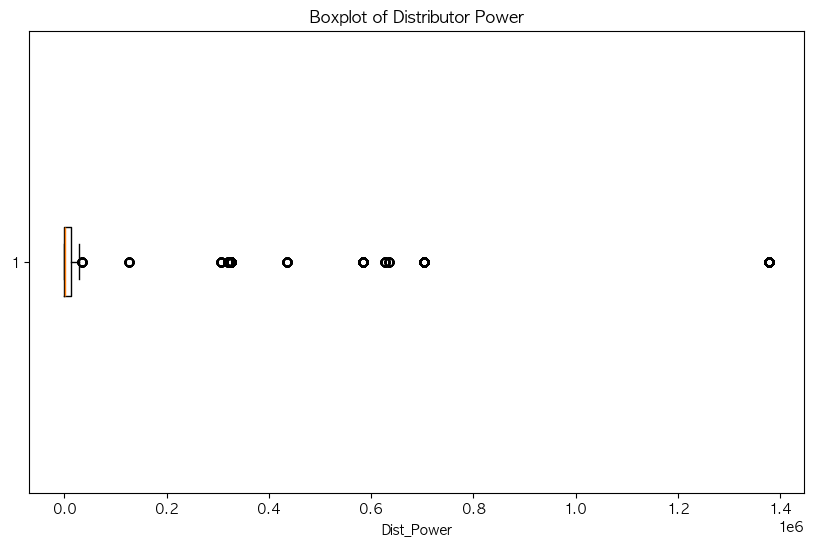

In [76]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['dist_power_weighted'], vert=False)
plt.title('Boxplot of Distributor Power')
plt.xlabel('Dist_Power')
plt.show()

#### 4.4.7 director 전처리

##### 감독 두 명 이상인 경우, 쉼표로 분리하여, 첫번째 감독을 대표 감독으로 선택

In [77]:
data['director'] = data['director'].str.split(',').str[0]

##### 감독의 흥행력 구하기

In [78]:
dir_power = data.groupby('director').agg({'box_off_num': 'sum', 'title': 'count'})
dir_power['dir_power'] = dir_power['box_off_num'] / dir_power['title']

dir_power.columns = ['dir_box_off_num_sum', 'dir_movie_num', 'dir_power']

dir_power = dir_power.sort_values(by='dir_power', ascending=False)

##### 감독의 작품 횟수를 바탕으로 가중치를 계산하였다

##### 감독의 작품 횟수 boxplot

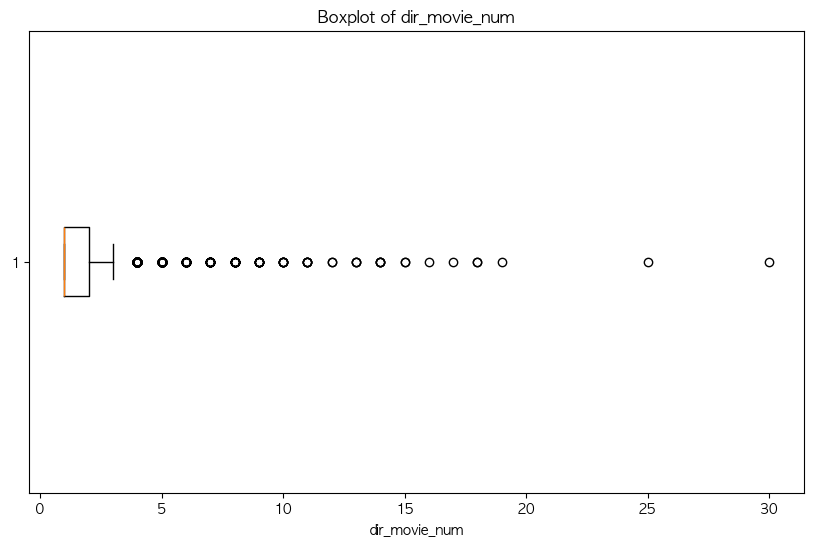

In [79]:
plt.figure(figsize=(10, 6))
plt.boxplot(dir_power['dir_movie_num'], vert=False)
plt.title('Boxplot of dir_movie_num')
plt.xlabel('dir_movie_num')
plt.show()

IQR 방식이 아닌 20회 이상을 이상치로 선정

In [80]:
dir_movie_num_over_20 = dir_power[dir_power['dir_movie_num'] >= 20]
print(dir_movie_num_over_20)

          dir_box_off_num_sum  dir_movie_num  dir_power
director                                               
카에데                       147             30       4.90
긴다이치코고로                    27             25       1.08


##### '카에데'와 '긴다이치코고로'인 행을 필터링하여 삭제

In [81]:
data = data[~data['director'].isin(['카에데', '긴다이치코고로'])]

##### 가중치가 부여된 감독의 흥행력 계산

In [82]:
max_dir_movie_num = dir_power['dir_movie_num'].max()

dir_power['dir_power_weighted'] = dir_power.apply(
    lambda row: row['dir_power'] * (row['dir_movie_num'] / max_dir_movie_num) if row['dir_movie_num'] > 0 else None,
axis=1
)

dir_power = dir_power.sort_values(by='dir_power_weighted', ascending=False)

##### dir_power 파일 저장 및 데이터에 병합

In [83]:
dir_power.to_excel('/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/calculated_power_data/dir_power.xlsx')

dir_power = dir_power.reset_index()

data = pd.merge(data, dir_power[['director', 'dir_power', 'dir_power_weighted']], on='director', how='left')

##### 결측치 확인

In [84]:
data['dir_power_weighted'].isnull().sum()

0

##### dir_power_weighted 기초통계량 확인

In [85]:
data['dir_power_weighted'].describe()

count    7.552000e+03
mean     2.541515e+04
std      9.165213e+04
min      3.333333e-02
25%      8.400000e+00
50%      1.862500e+02
75%      3.559192e+03
max      1.259593e+06
Name: dir_power_weighted, dtype: float64

##### dir_power 시각화

##### dir_power_weighted boxplot

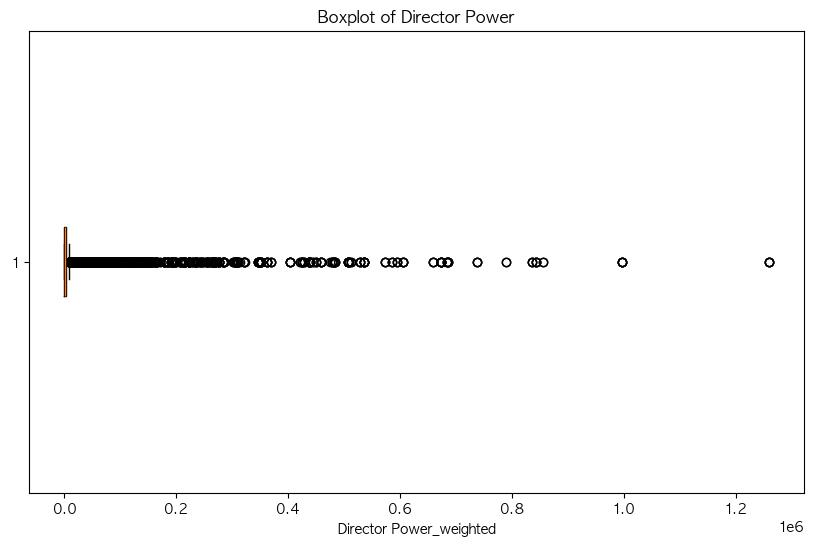

In [86]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['dir_power_weighted'], vert=False)
plt.title('Boxplot of Director Power')
plt.xlabel('Director Power_weighted')
plt.show()

##### dir_power_weighted histogram

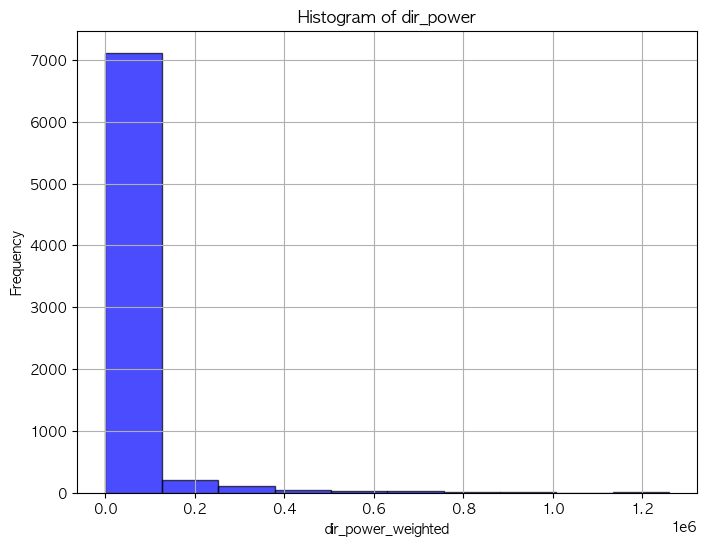

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(data['dir_power_weighted'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of dir_power')
plt.xlabel('dir_power_weighted')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### dir_power & box_off_num scatter plot

<Figure size 1000x600 with 0 Axes>

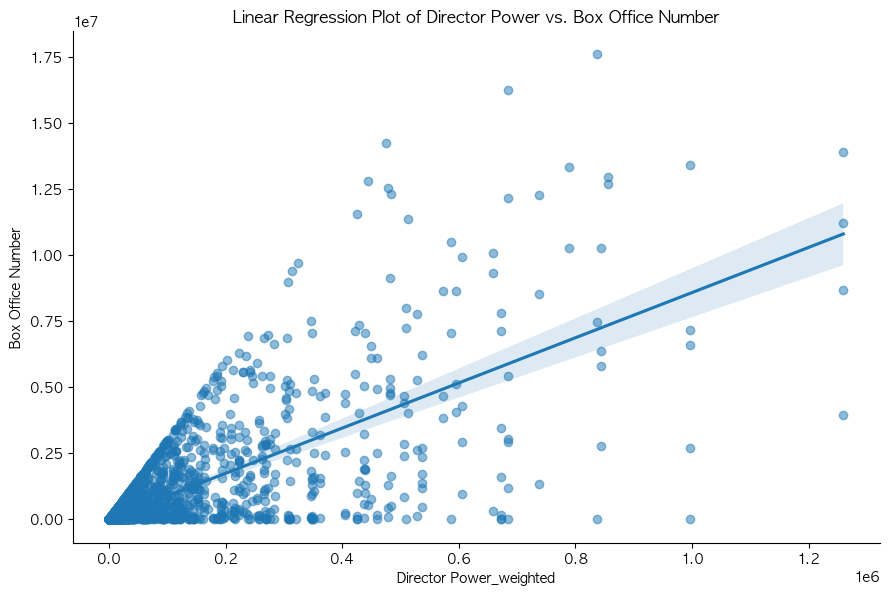

In [88]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='dir_power_weighted', y='box_off_num', data=data, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Linear Regression Plot of Director Power vs. Box Office Number')
plt.xlabel('Director Power_weighted')
plt.ylabel('Box Office Number')
plt.show()

#### 4.4.8 actors 전처리

##### actors 컬럼에서 앞의 3명까지를 main_actors(주연 배우)로 선택

In [89]:
def keep_top_3_actors(actors_str):
    if isinstance(actors_str, str):
        actors_list = actors_str.split(',')
        top_3_actors = ', '.join(actors_list[:3])
        return top_3_actors
    else:
        return ''

data['main_actors'] = data['actors'].apply(keep_top_3_actors)

##### 배우 흥행력 구하기
##### 2010년부터 2019년까지 main_actors(주연배우)의 평균 관객수

In [90]:
actors_df = data['main_actors'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('actor')

actor_counts = actors_df.value_counts()

act_box_off_num_sum = data.assign(actor=data['main_actors'].str.split(', ')).explode('actor').groupby('actor')['box_off_num'].sum()

act_power = pd.DataFrame({'unique_actors': actor_counts.index, 'act_movie_num': actor_counts.values})
act_power['act_box_off_num_sum'] = act_power['unique_actors'].map(act_box_off_num_sum)
act_power['act_power'] = act_power['act_box_off_num_sum'] / act_power['act_movie_num']

##### 주연배우의 작품 횟수를 바탕으로 가중치 계산

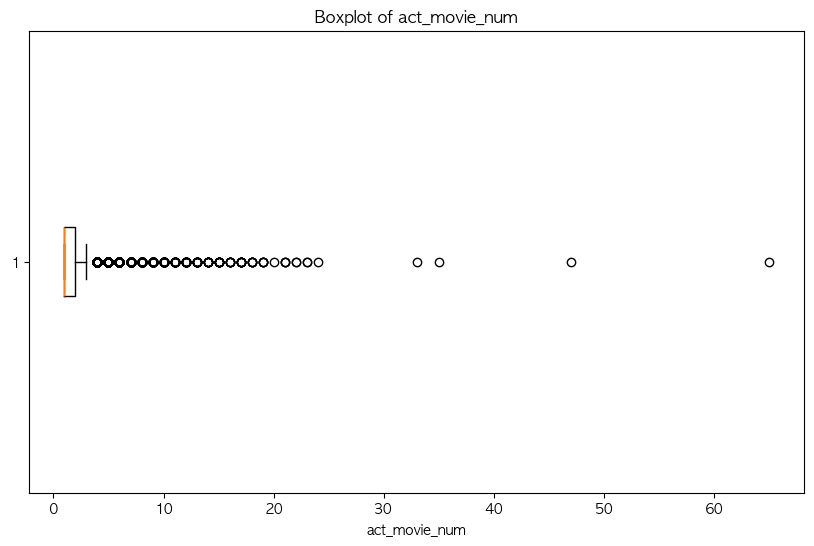

In [91]:
plt.figure(figsize=(10, 6))
plt.boxplot(act_power['act_movie_num'], vert=False)
plt.title('Boxplot of act_movie_num')
plt.xlabel('act_movie_num')
plt.show()

출연횟수를 가중치로 주기 위해서 boxplot을 통해 act_movie_num의 이상치를 확인하였다.

In [92]:
act_movie_num_over_30 = act_power[act_power['act_movie_num'] >= 30]
print(act_movie_num_over_30)

  unique_actors  act_movie_num  act_box_off_num_sum     act_power
0           이채담             65                 7834    120.523077
1           이은미             47                11999    255.297872
2           엄상현             35              3037526  86786.457143
3           박주빈             33                 1943     58.878788


IQR 방식이 아닌 30회 이상 출연인 행 삭제

In [93]:
exclude_act_names = ['이채담', '이은미', '엄상현', '박주빈']
exclude_pattern = '|'.join(map(re.escape, exclude_act_names))
data = data[~data['main_actors'].str.contains(exclude_pattern)]
act_power = act_power[~act_power['unique_actors'].str.contains(exclude_pattern)]

##### 가중치가 부여된 배우의 흥행력 계산

In [94]:
max_actor_movie_num = act_power['act_movie_num'].max()

act_power['act_power_weighted'] = act_power['act_power'] * (act_power['act_movie_num'] / max_actor_movie_num)

act_power.columns = ['unique_actors', 'act_movie_num', 'act_box_off_num_sum', 'act_power', 'act_power_weighted']
act_power = act_power.sort_values(by='act_power_weighted', ascending=False)

In [95]:
print(max_actor_movie_num)

24


##### 배우 흥행력 데이터프레임을 파일로 따로 저장

In [96]:
act_power.to_excel('/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/calculated_power_data/act_power.xlsx', index=False)

##### act_power, act_power_weighted를 기존 데이터에 병합

In [97]:
def calculate_average(row):
    actors = row['main_actors'].split(', ')
    avg_act_power = []
    avg_act_power_weighted = []
    for actor in actors:
        actor_power_row = act_power[act_power['unique_actors'] == actor.strip()]
        if not actor_power_row.empty:
            avg_act_power.append(actor_power_row['act_power'].values[0])
            avg_act_power_weighted.append(actor_power_row['act_power_weighted'].values[0])
    avg_act_power_mean = sum(avg_act_power) / len(avg_act_power) if avg_act_power else None
    avg_act_power_weighted_mean = sum(avg_act_power_weighted) / len(avg_act_power_weighted) if avg_act_power_weighted else None
    return avg_act_power_mean, avg_act_power_weighted_mean

data['act_power'], data['act_power_weighted'] = zip(*data.apply(calculate_average, axis=1))

##### act_power 시각화

##### act_power histogram

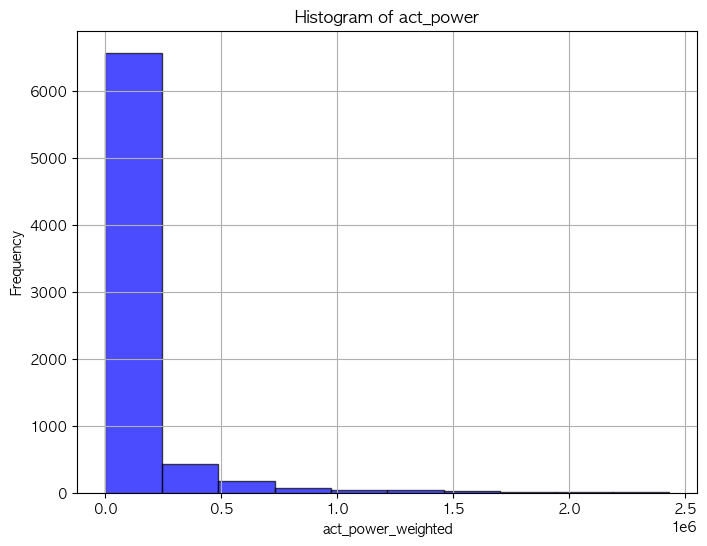

In [98]:
plt.figure(figsize=(8, 6))
plt.hist(data['act_power_weighted'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of act_power')
plt.xlabel('act_power_weighted')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### act_power boxplot

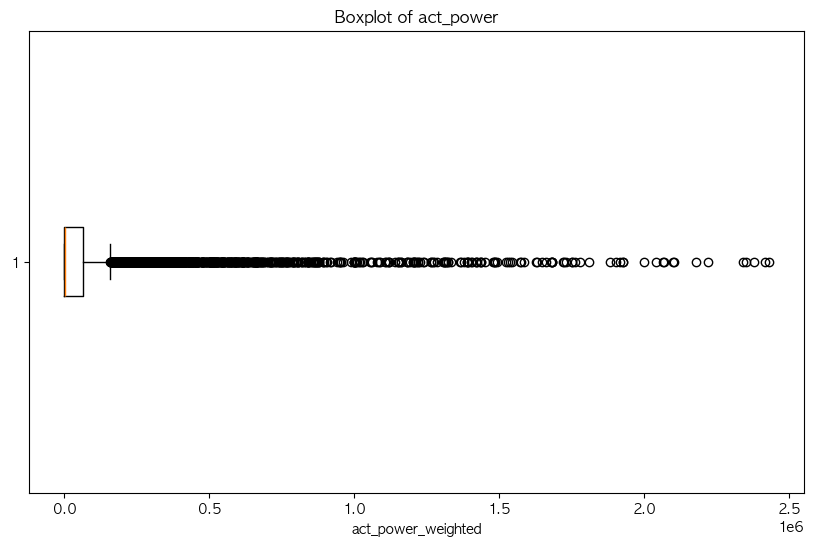

In [99]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['act_power_weighted'], vert=False)
plt.title('Boxplot of act_power')
plt.xlabel('act_power_weighted')
plt.show()

##### act_power & box_off_num scatter plot

<Figure size 1000x600 with 0 Axes>

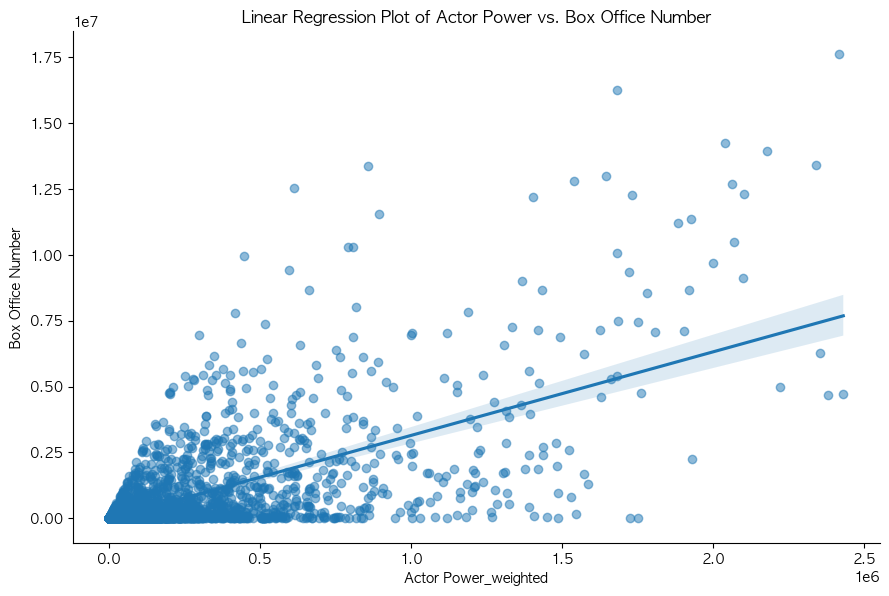

In [100]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='act_power_weighted', y='box_off_num', data=data, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Linear Regression Plot of Actor Power vs. Box Office Number')
plt.xlabel('Actor Power_weighted')
plt.ylabel('Box Office Number')
plt.show()

### 4.5 box_off_num 범주화

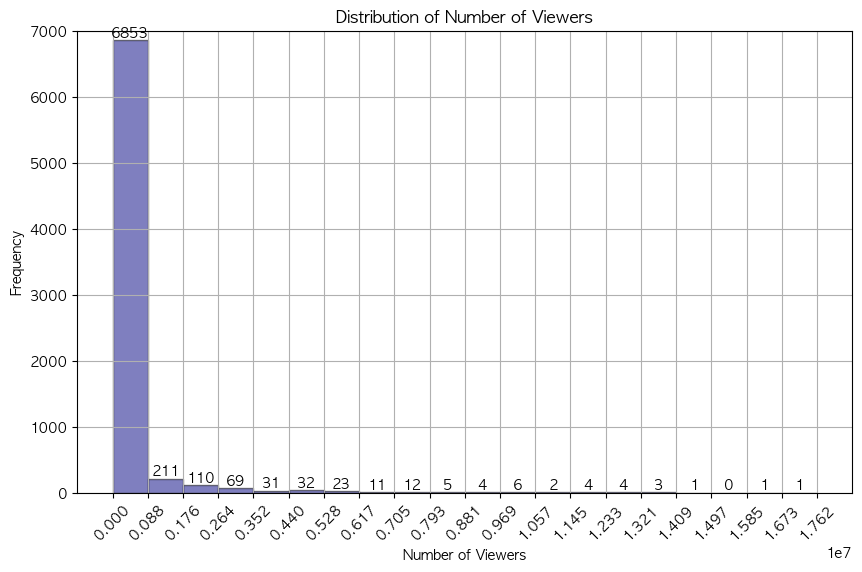

In [101]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data['box_off_num'], bins=20, color='navy', edgecolor='black', alpha=0.5)

plt.title('Distribution of Number of Viewers')
plt.xlabel('Number of Viewers')
plt.ylabel('Frequency')
plt.grid(True)
plt.ylim(0, 7000)

bin_centers = 0.5 * (bins[1:] + bins[:-1])
for count, x in zip(counts, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.xticks(bins, rotation=45)

plt.show()


In [102]:
def categorize_box_office(num):
    if num < 100:
        return '0-100'
    elif num < 1000:
        return '100-1천'
    elif num < 2000:
        return '1천-2천'
    elif num < 5000:
        return '2천-5천'
    elif num < 10000:
        return '5천-1만'
    elif num < 100000:
        return '1만-10만'
    elif num < 300000:
        return '10만-30만'
    elif num < 1000000:
        return '30만-100만'
    elif num < 2000000:
        return '100만-200만'
    elif num < 4000000:
        return '200만-400만'
    elif num < 7000000:
        return '400만-700만'
    elif num < 10000000:
        return '700만-1000만'
    else:
        return '천만 이상'


data['box_off_category'] = data['box_off_num'].apply(categorize_box_office)

category_counts = data['box_off_category'].value_counts().sort_index()

result_table = pd.DataFrame({'범주': category_counts.index, '빈도': category_counts.values})
print(result_table)

            범주    빈도
0        0-100  2052
1       100-1천  1113
2    100만-200만   202
3      10만-30만   424
4       1만-10만  1224
5        1천-2천   528
6    200만-400만   168
7        2천-5천   624
8     30만-100만   409
9    400만-700만    76
10       5천-1만   520
11  700만-1000만    23
12       천만 이상    20


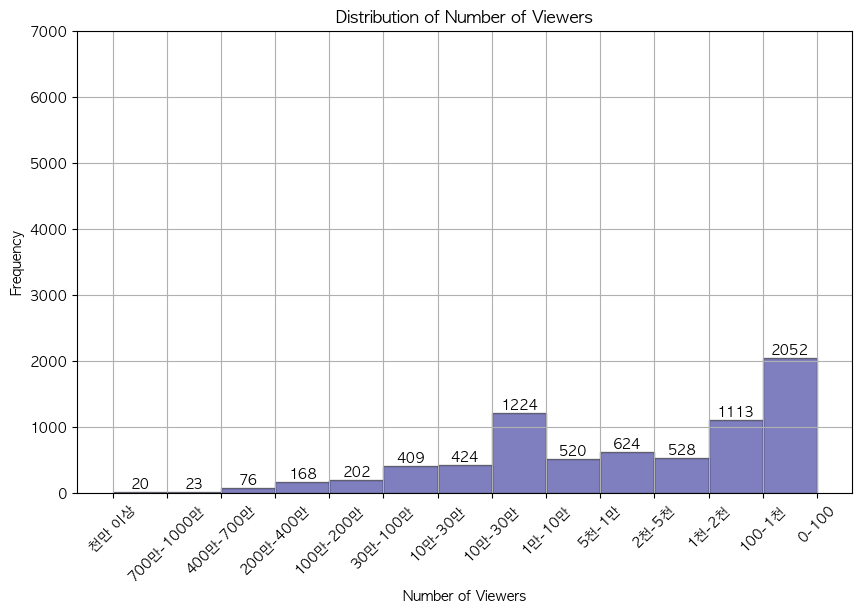

In [103]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data['box_off_category'], bins=13, color='navy', edgecolor='black', alpha=0.5)

plt.title('Distribution of Number of Viewers')
plt.xlabel('Number of Viewers')
plt.ylabel('Frequency')
plt.grid(True)
plt.ylim(0, 7000)

bin_centers = 0.5 * (bins[1:] + bins[:-1])
for count, x in zip(counts, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.xticks(bins, rotation=45)

plt.show()


위와 같이 범주를 나누어보았다.

영화 관객 수는 연속적인 값으로 회귀 모델을 사용하는 것이 적절해 보이지만, 모델 간의 비교가 어려운 단점이 있다. 

이를 해결하기 위해, 와인 품질 평가처럼 예상 관객 수를 구간별로 나누고 분류 문제로 접근할 수도 있다. 

위의 그래프에서 보인거처럼 관객수 등의 변수들을 범주형으로 바꿔서 decisiontreeclassifier모델 사용하려 하였다.

이렇게 하면 모델 간의 정확도를 비교하는 것이 가능해진다.

그러나 이 방법은 영화 관객 수의 분포 불균형 문제를 야기하며, 특히 흥행한 영화들에 대한 모델 학습이 어려워진다. 

또한 우리가 원하는 관객 '수' 예측과는 거리가 멀기도 하고, 데이터가 많다 보니까 관객수의 구간을 정하는데 어려움이 있었다.

이런 문제를 고려하여, 결국 회귀 모델을 선택하였고, 범주형 변수들은 더미변수화를 해주기로 결정하였다. 또한 모델 간의 비교는 R2 스코어, mae, mse, rmse로 진행하기로 결정하였다.

In [104]:
data.drop('box_off_category', axis=1, inplace=True)

### 4.6 정규화 및 표준화

#### 4.6.1 로그변환

왜도 : 분포의 정규분포에 비해서 얼마나 비대칭성을 나타내는 척도이다.
왜도 값이 양의 값을 가지면(Positive Skewness) - 정규 분포보다 오른쪽에 위치, 
음을 값을 가지면(Negative Skewness) - 정규 분포보다 왼쪽에 위치

첨도 : 샘플의 점수가 평균을 중심으로 가까이 몰려 있을수록 분포의 정점은 더욱 뾰족하다.
이 뾰족함이 의미하는 것이 첨도이고 분산도가 크면 집단이 이질적이고 분포의 높이가 낮아지면, 
분산도가 작으면 집단이 동질적이고 분포의 높이가 높아진다.

로그를 취하는 이유는
1. 큰 수를 작게 만들고
2. 그로 인해 복잡한 계산을 쉽게 만들고
3. 왜도와 첨도를 줄여서 데이터 분석 시 의미있는 결과를 도출한다.

데이터 분석을 하기 위해 log를 취하는 이유는 한마디로 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함이다.

데이터 간 편차를 줄여 왜도1(skewness)와 첨도2(Kurtosis)를 줄일 수 있기 때문에 정규성이 높아진다.

재산 보유액과 같이 분석하려는 데이터 간의 편차가 큰 경우에 로그를 취하면 의미있는 결과를 얻을 가능성이 높아진다.

기본적으로 log안의 x값은 양수만 가능하다.
하지만 0에 가까운 아주 작은 양수의 경우 (ex. 0.0000000001)
음의 무한대에 가까워지게 된다. (너무 작은 값의 경우 프로그램의 계산이 -inf가 나오게됨)

이를 방지하기 위해 1을 더함으로써 0보다 큰 양수의 값을 갖게 된다.

각각의 데이터에 1보다 작은, 0에 가까운 수의 개수를 확인해본 결과 존재하였다.

0에 가까운 수를 그냥 로그변환을 취하면 그 값이 거의 음의 무한대가 되기 때문에 log1p를 해준다

##### 4.6.1.1 dist_power 로그변환

In [105]:
num_non_positive = (data['dist_power_weighted'] < 1).sum()

if num_non_positive > 0:
    print(f"dist_power 열에 {num_non_positive}개의 0에 가까운 값이 포함되어 있습니다.")
else:
    print("dist_power 열에는 0에 가까운 값이 없습니다.")

dist_power 열에 357개의 0에 가까운 값이 포함되어 있습니다.


In [106]:
data['dist_power_weighted_log'] = np.log1p(data['dist_power_weighted'])

##### 4.6.1.2 dir_power 로그변환

In [107]:
num_non_positive = (data['dir_power_weighted'] < 1).sum()

if num_non_positive > 0:
    print(f"dir_power 열에 {num_non_positive}개의 0에 가까운 값이 포함되어 있습니다.")
else:
    print("dir_power 열에는 0에 가까운 값이 없습니다.")


dir_power 열에 1012개의 0에 가까운 값이 포함되어 있습니다.


In [108]:
data['dir_power_weighted_log'] = np.log1p(data['dir_power_weighted'])

##### 4.6.1.3 act_power 로그변환

In [109]:
num_non_positive = (data['act_power_weighted'] < 1).sum()

if num_non_positive > 0:
    print(f"act_power 열에 {num_non_positive}개의 0에 가까운 값이 포함되어 있습니다.")
else:
    print("act_power 열에는 0에 가까운 값이 없습니다.")


act_power 열에 842개의 0에 가까운 값이 포함되어 있습니다.


In [110]:
data['act_power_weighted_log'] = np.log1p(data['act_power_weighted'])

##### 4.6.1.4 시각화 dist_power & dir_power & act_power

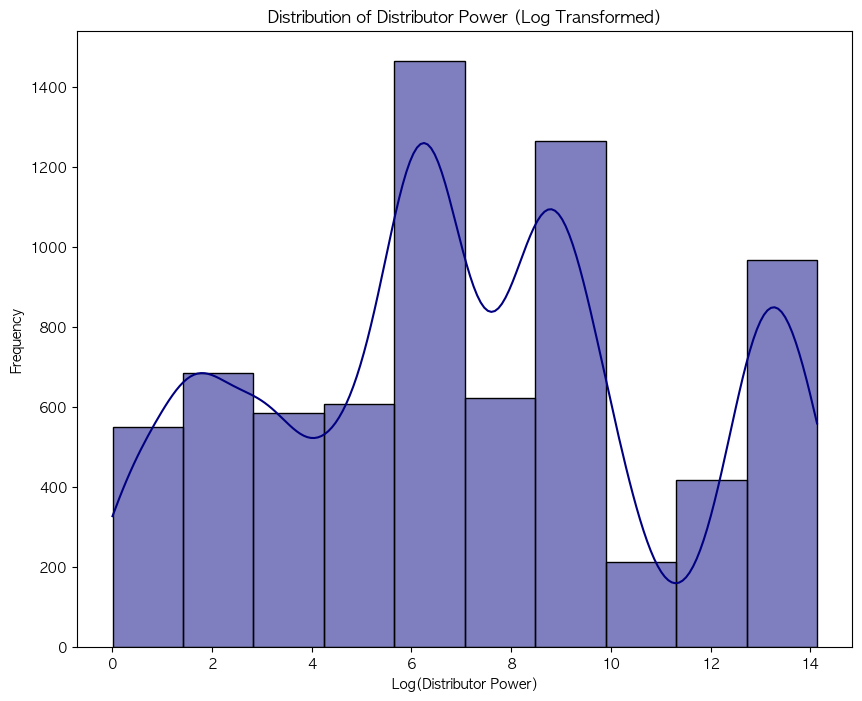

In [111]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='dist_power_weighted_log', kde=True, color='navy', bins=10)
plt.title('Distribution of Distributor Power (Log Transformed)')
plt.xlabel('Log(Distributor Power)')
plt.ylabel('Frequency')
plt.show()

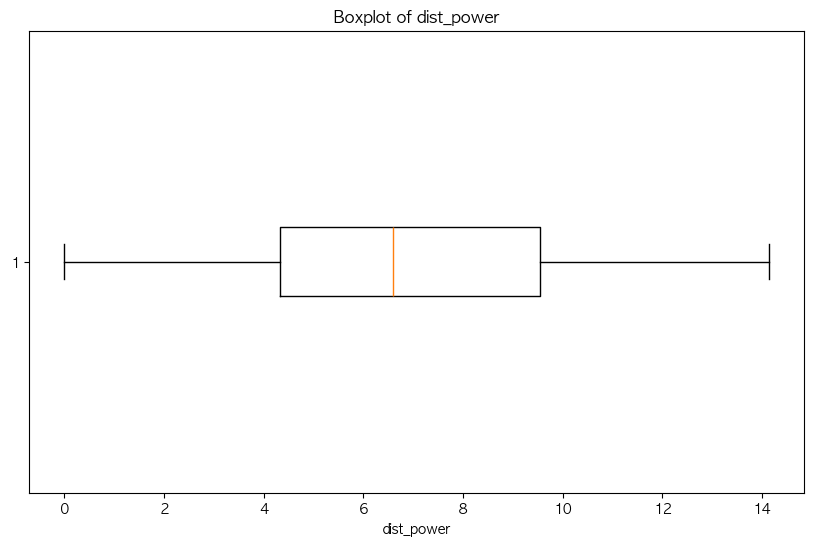

In [112]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['dist_power_weighted_log'], vert=False)
plt.title('Boxplot of dist_power')
plt.xlabel('dist_power')
plt.show()

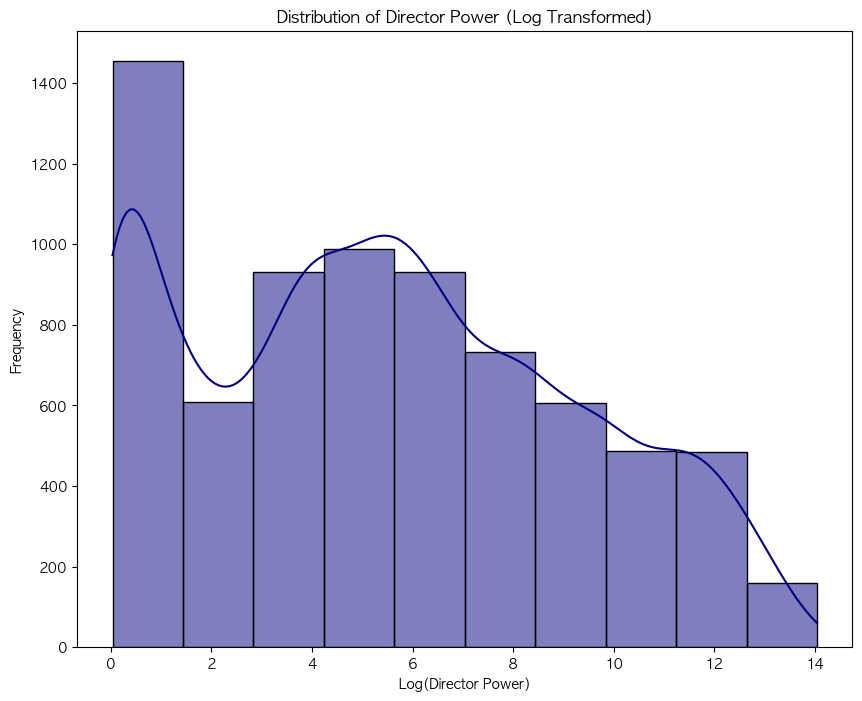

In [113]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='dir_power_weighted_log', kde=True, color='navy', bins=10)
plt.title('Distribution of Director Power (Log Transformed)')
plt.xlabel('Log(Director Power)')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'dir_power')

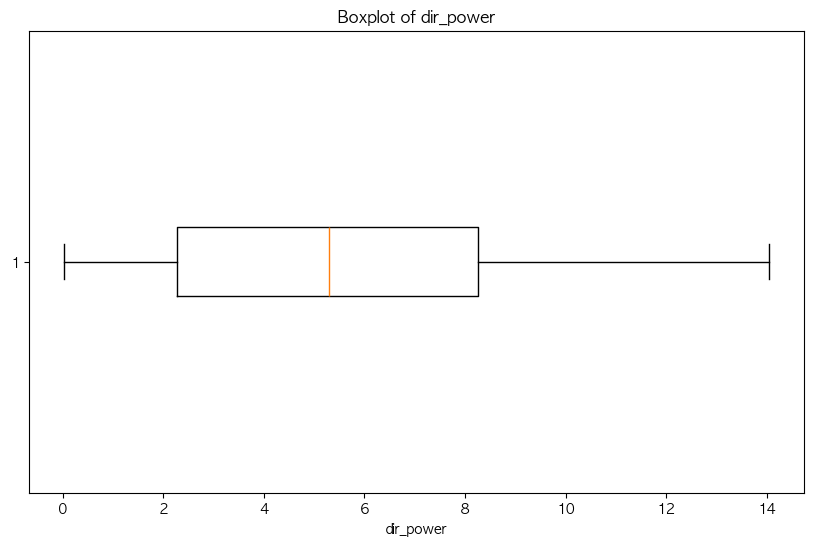

In [114]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['dir_power_weighted_log'], vert=False)
plt.title('Boxplot of dir_power')
plt.xlabel('dir_power')

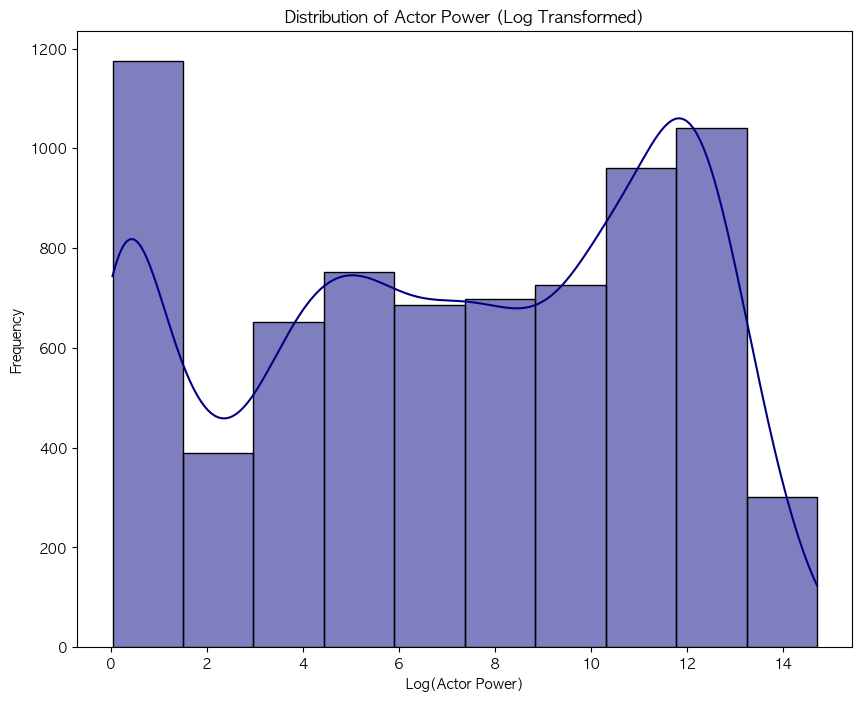

In [115]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='act_power_weighted_log', kde=True, color='navy', bins=10)
plt.title('Distribution of Actor Power (Log Transformed)')
plt.xlabel('Log(Actor Power)')
plt.ylabel('Frequency')
plt.show()

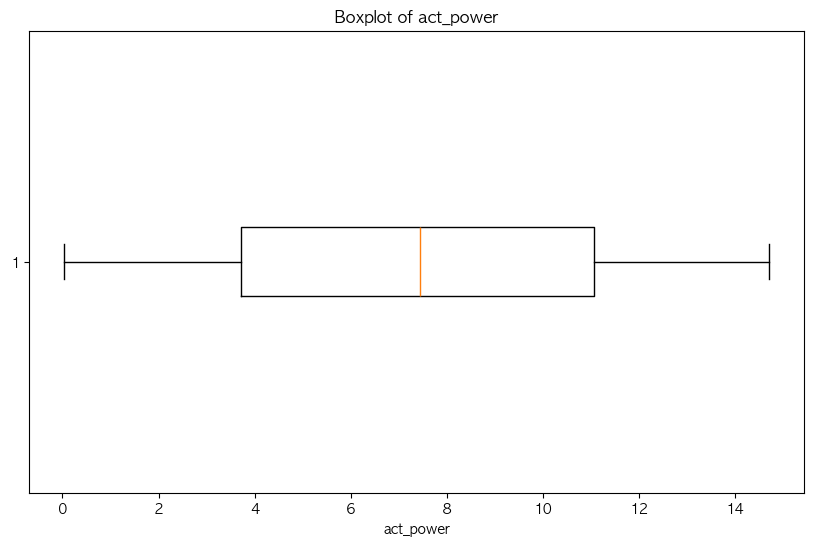

In [116]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['act_power_weighted_log'], vert=False)
plt.title('Boxplot of act_power')
plt.xlabel('act_power')
plt.show()

#### 4.6.2 표준화

##### train, test set으로 나눈 후에, 이상치에 덜 민감한 Robust Scaling을 할 예정이다.

로버스트 스케일러(RobustScaler)는 중앙값(median)과 IQR(Interquartile Range, 사분위 범위)을 사용하여 데이터를 스케일링하는 방법으로, 특히 이상치(outliers)에 민감하지 않은 스케일링을 원할 때 유용합니다. 다음은 로버스트 스케일러의 주요 장점들입니다:

로버스트 스케일러의 장점

1. 이상치에 대한 강건성 (Robustness to Outliers):

로버스트 스케일러는 평균과 표준편차 대신 중앙값과 IQR을 사용하여 데이터를 스케일링합니다. 이는 이상치의 영향을 최소화하여 데이터의 분포를 왜곡하지 않습니다.
중앙값은 데이터의 중간값이므로 극단적인 값에 영향을 받지 않습니다.
IQR은 1사분위수(Q1)와 3사분위수(Q3)의 차이로 계산되며, 중앙 집중된 50%의 데이터를 사용하여 범위를 계산합니다. 따라서 극단적인 값이 스케일링 과정에 미치는 영향이 적습니다.

2. 더 안정적인 성능:

이상치가 많이 포함된 데이터셋에서 로버스트 스케일링을 사용하면 모델의 성능이 더 안정적이고 신뢰할 수 있게 됩니다. 이는 특히 회귀 분석, SVM, k-최근접 이웃 등 거리 기반 모델에서 유리합니다.
데이터의 중앙 집중 경향을 유지하면서, 이상치로 인해 모델이 오버핏되거나 성능이 저하되는 것을 방지합니다.

3. 실제 데이터를 잘 반영:

로버스트 스케일러는 데이터의 실제 분포를 잘 반영하며, 중앙값과 IQR을 사용하여 특이값이나 극단값의 영향을 줄이기 때문에 더 현실적인 스케일링 결과를 제공합니다.
이는 데이터의 분포가 정규분포를 따르지 않거나 비대칭인 경우에도 유용합니다.

### 4.7 Visulization

#### 4.7.1 범주형 변수 시각화

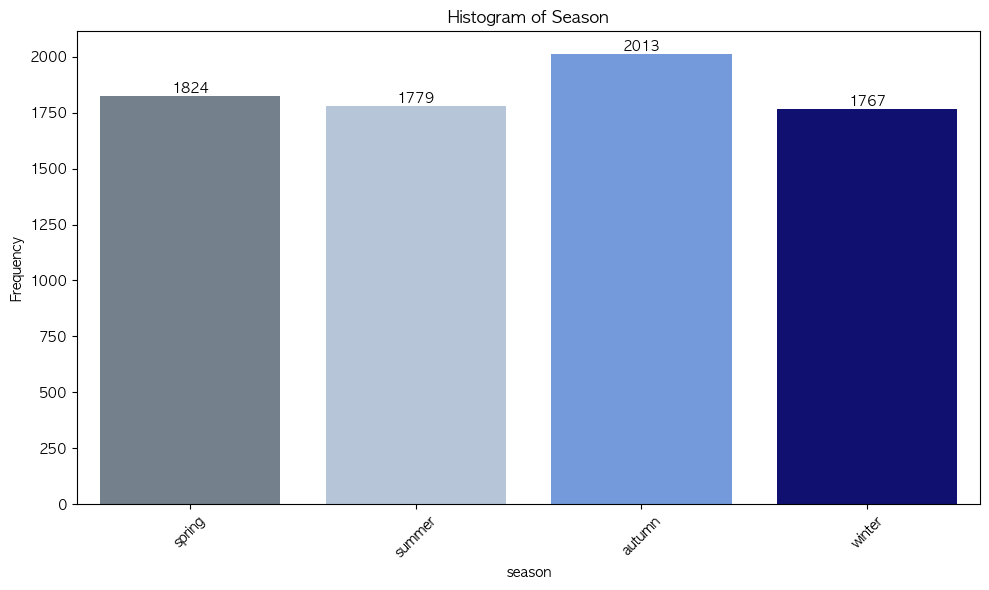

In [117]:
order = ['spring', 'summer', 'autumn', 'winter']

plt.figure(figsize=(10, 6))
colors = ['slategray', 'lightsteelblue', 'cornflowerblue', 'navy']
sns.countplot(data=data, x='season', palette=colors, order=order)
plt.title('Histogram of Season')
plt.xlabel('season')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

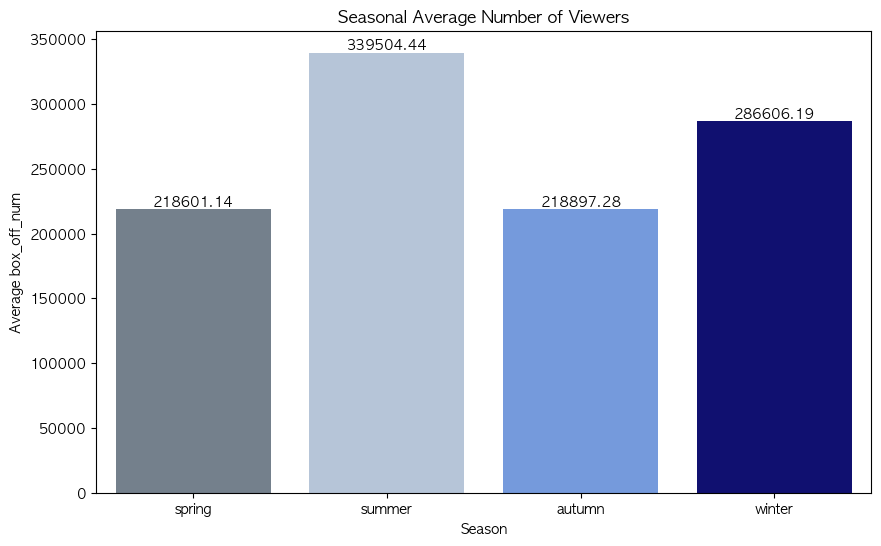

In [118]:
season_avg = data.groupby('season')['box_off_num'].mean()

season_order = ['spring', 'summer', 'autumn', 'winter']
season_avg = season_avg.reindex(season_order)

plt.figure(figsize=(10, 6))

colors = ['slategray', 'lightsteelblue', 'cornflowerblue', 'navy']

bars = sns.barplot(x=season_avg.index, y=season_avg.values, palette=colors)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center', va='bottom')
    
plt.title('Seasonal Average Number of Viewers')
plt.xlabel('Season')
plt.ylabel('Average box_off_num')
plt.show()


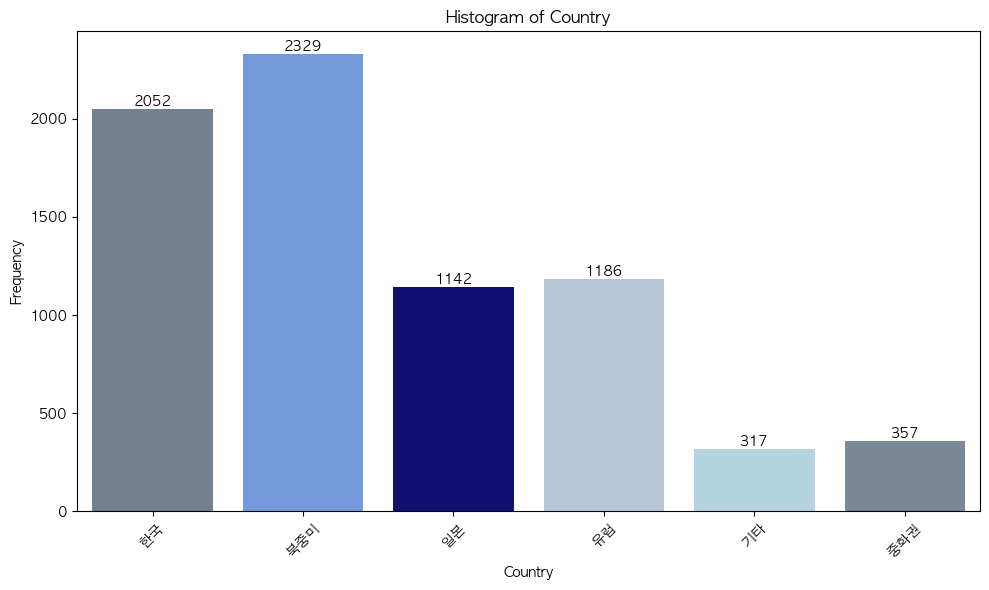

In [119]:
plt.figure(figsize=(10, 6))
colors = ['slategray', 'cornflowerblue', 'navy', 'lightsteelblue', 'lightblue', 'lightslategray', 'royalblue']

sns.countplot(data=data, x='country', palette=colors)
plt.title('Histogram of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


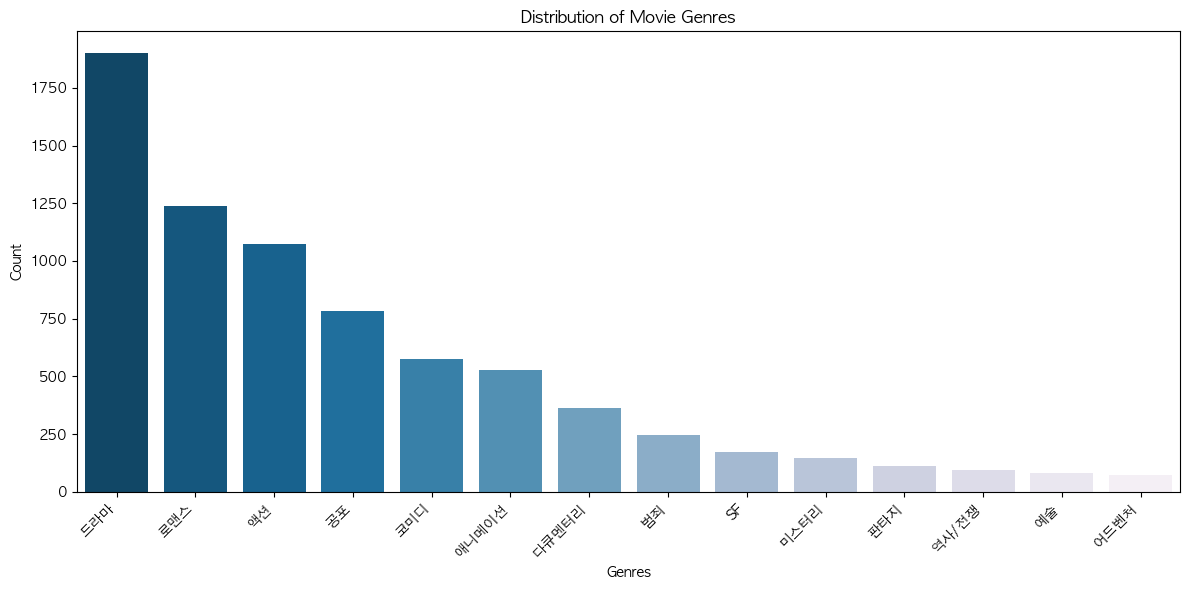

In [120]:
genre_counts = data['genre'].value_counts()

palette = sns.color_palette("PuBu", len(genre_counts))[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=palette)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


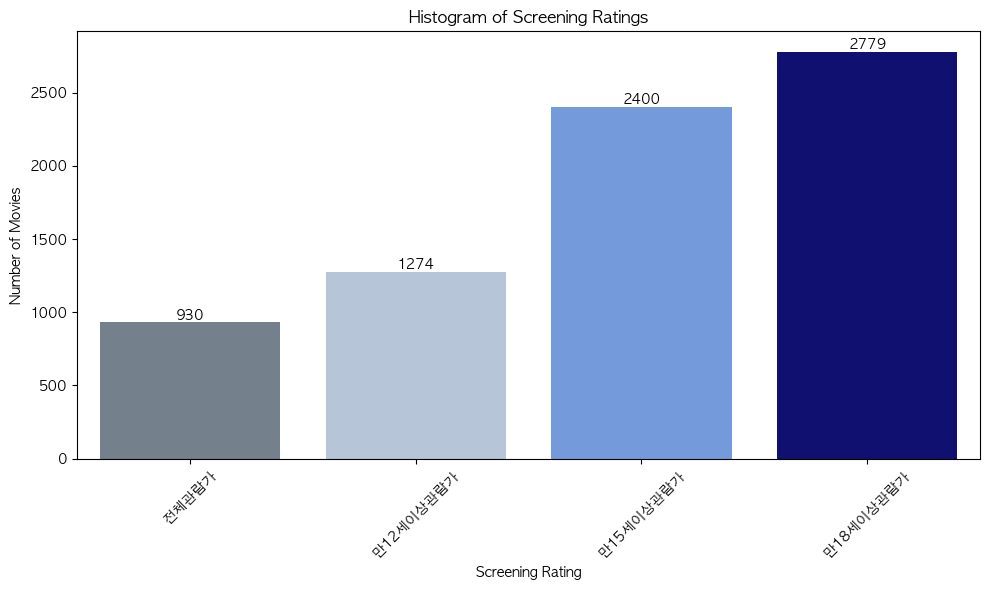

In [121]:
order = ['전체관람가', '만12세이상관람가', '만15세이상관람가', '만18세이상관람가']

plt.figure(figsize=(10, 6))
colors = ['slategray', 'lightsteelblue', 'cornflowerblue', 'navy']

sns.countplot(data=data, x='screening_rat', palette=colors, order=order)
plt.title('Histogram of Screening Ratings')
plt.xlabel('Screening Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


### 4.8 더미변수화

Label encoding : 문자형을 정수형으로 인코딩 하는 과정, 예를 들어 'english', 'korean', 'math'를 0, 1, 2 처럼 변환시키는 것이다. 하지만 레이블 인코딩에는 주의할 점이 있다.
숫자의 특성 때문에 가중치의 차이가 생기는 점인데, 'english'와 'science'의 중요도는 똑같은 반면에 인코딩을 하고 난 후에는 더 큰 숫자로 인코딩 된 'science'의 중요도가 높아졌다.

레이블 인코딩은 숫자 크기의 차이가 모델에 영향을 주지 않는 트리 계열 모델 (DecisionTree, RandomForest,...) 에 적용해야한다.
선형 계열 (Logistic Regressor, SVM,...)과 같은 숫자크기가 모델에 영향을 받는 모델들에는 사용하면 안된다.

따라서, 숫자의 크기 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 Label Encoding보다 One Hot Encoding을 통해 해결해주어야 한다.

one-hot encoding : 레이블 인코딩으로 할당된 숫자를 각 열을 추가해서 0또는 1로 나타내는 것이다

다시 한번 강조하지만 이 과정은 숫자의 크고 작은 특성(중요도)을 없애기 위함이다.

Dummy encoding은 one-hot encoding의 변형이다. 하나의 범주를 기준 범주로 선택하고, 나머지 범주만 이진 벡터로 변환한다. 
기준 범주는 벡터에서 제외되어, 다른 범주의 변수가 모두 0일 때 그 범주로 간주한다. 이는 다중공선성 문제를 피하는 데 유용하다.

##### Dummy encoding 해주기

In [122]:
data = pd.get_dummies(data, columns=['season', 'country', 'screening_rat', 'genre'], drop_first=True, dtype=int)

### 4.9 최종 데이터셋

#### 4.9.1 전처리된 data 저장

In [123]:
data.columns

Index(['title', 'release_date', 'box_off_num', 'distributor', 'director',
       'actors', 'dist_power', 'dist_power_weighted', 'dir_power',
       'dir_power_weighted', 'main_actors', 'act_power', 'act_power_weighted',
       'dist_power_weighted_log', 'dir_power_weighted_log',
       'act_power_weighted_log', 'season_spring', 'season_summer',
       'season_winter', 'country_북중미', 'country_유럽', 'country_일본',
       'country_중화권', 'country_한국', 'screening_rat_만15세이상관람가',
       'screening_rat_만18세이상관람가', 'screening_rat_전체관람가', 'genre_공포',
       'genre_다큐멘터리', 'genre_드라마', 'genre_로맨스', 'genre_미스터리', 'genre_범죄',
       'genre_애니메이션', 'genre_액션', 'genre_어드벤처', 'genre_역사/전쟁', 'genre_예술',
       'genre_코미디', 'genre_판타지'],
      dtype='object')

In [124]:
data.isnull().sum()

title                      0
release_date               0
box_off_num                0
distributor                0
director                   0
actors                     0
dist_power                 0
dist_power_weighted        0
dir_power                  0
dir_power_weighted         0
main_actors                0
act_power                  0
act_power_weighted         0
dist_power_weighted_log    0
dir_power_weighted_log     0
act_power_weighted_log     0
season_spring              0
season_summer              0
season_winter              0
country_북중미                0
country_유럽                 0
country_일본                 0
country_중화권                0
country_한국                 0
screening_rat_만15세이상관람가    0
screening_rat_만18세이상관람가    0
screening_rat_전체관람가        0
genre_공포                   0
genre_다큐멘터리                0
genre_드라마                  0
genre_로맨스                  0
genre_미스터리                 0
genre_범죄                   0
genre_애니메이션                0
genre_액션      

In [125]:
rows_with_null = data[data.isnull().any(axis=1)]

if not rows_with_null.empty:
    print("Null 값이 있는 행:")
    print(rows_with_null)
else:
    print("Null 값이 없습니다.")

Null 값이 없습니다.


In [126]:
all_zeros_rows = data[(data == 0).all(axis=1)]
print(all_zeros_rows)

Empty DataFrame
Columns: [title, release_date, box_off_num, distributor, director, actors, dist_power, dist_power_weighted, dir_power, dir_power_weighted, main_actors, act_power, act_power_weighted, dist_power_weighted_log, dir_power_weighted_log, act_power_weighted_log, season_spring, season_summer, season_winter, country_북중미, country_유럽, country_일본, country_중화권, country_한국, screening_rat_만15세이상관람가, screening_rat_만18세이상관람가, screening_rat_전체관람가, genre_공포, genre_다큐멘터리, genre_드라마, genre_로맨스, genre_미스터리, genre_범죄, genre_애니메이션, genre_액션, genre_어드벤처, genre_역사/전쟁, genre_예술, genre_코미디, genre_판타지]
Index: []

[0 rows x 40 columns]


XGBoost, Gradient Boosting, 그리고 Random Forest를 사용하여 영화 관객 수를 예측할 때 상수항을 고려할 필요는 없다

In [127]:
data.shape

(7383, 40)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7383 entries, 0 to 7551
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   title                    7383 non-null   object        
 1   release_date             7383 non-null   datetime64[ns]
 2   box_off_num              7383 non-null   int64         
 3   distributor              7383 non-null   object        
 4   director                 7383 non-null   object        
 5   actors                   7383 non-null   object        
 6   dist_power               7383 non-null   float64       
 7   dist_power_weighted      7383 non-null   float64       
 8   dir_power                7383 non-null   float64       
 9   dir_power_weighted       7383 non-null   float64       
 10  main_actors              7383 non-null   object        
 11  act_power                7383 non-null   float64       
 12  act_power_weighted       7383 non-null 

In [129]:
data.describe()

,release_date,box_off_num,dist_power,dist_power_weighted,dir_power,dir_power_weighted,act_power,act_power_weighted,dist_power_weighted_log,dir_power_weighted_log,...,genre_로맨스,genre_미스터리,genre_범죄,genre_애니메이션,genre_액션,genre_어드벤처,genre_역사/전쟁,genre_예술,genre_코미디,genre_판타지
count,7383,7.383000e+03,7.383000e+03,7.383000e+03,7.383000e+03,7.383000e+03,7.383000e+03,7.383000e+03,7383.000000,7383.000000,...,7383.000000,7383.000000,7383.000000,7383.000000,7383.000000,7383.000000,7383.000000,7383.000000,7383.000000,7383.000000
mean,2015-07-25 17:53:30.889881856,2.640905e+05,2.636389e+05,1.331287e+05,2.639970e+05,2.594001e+04,2.734494e+05,9.056152e+04,7.139848,5.456780,...,0.167547,0.019911,0.033049,0.071245,0.145334,0.009617,0.013003,0.011107,0.078153,0.015170
min,2010-01-02 00:00:00,0.000000e+00,1.000000e+00,3.076923e-03,5.000000e-01,3.333333e-02,1.000000e+00,4.166667e-02,0.003072,0.032790,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013-09-12 00:00:00,6.000000e+01,4.751031e+02,7.515077e+01,1.300000e+02,8.733333e+00,4.346667e+02,3.989583e+01,4.332715,2.275551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015-10-12 00:00:00,1.989000e+03,1.104800e+04,7.341662e+02,3.103000e+03,1.979000e+02,1.350600e+04,1.703333e+03,6.600097,5.292802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017-07-26 00:00:00,3.107550e+04,1.290238e+05,1.406016e+04,5.330975e+04,3.831200e+03,2.536869e+05,6.351641e+04,9.551172,8.251194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019-12-31 00:00:00,1.761504e+07,3.561249e+06,1.378298e+06,1.426158e+07,1.259593e+06,8.983778e+06,2.429852e+06,14.136361,14.046300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,1.063018e+06,5.608261e+05,3.229094e+05,8.832327e+05,9.261406e+04,6.271401e+05,2.319480e+05,3.956435,3.731491,...,0.373489,0.139703,0.178776,0.257251,0.352461,0.097599,0.113294,0.104808,0.268430,0.122237


In [130]:
data.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2010-2019년_data/2010-2019_preprocessed_data.xlsx", index=False)

#### 4.9.2 추가적으로 시리즈 유무에 따른 series 변수 추가

In [131]:
series_data = pd.read_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2010-2019년_data/시리즈 유무.xlsx")

data = pd.merge(data, series_data, on='title', how='left')

data['series'].fillna(0, inplace=True)

#### 4.9.3 모델링에 필요한 데이터셋 저장

##### 범주형 변수 + 필요없는 column drop

In [132]:
data.columns

Index(['title', 'release_date', 'box_off_num', 'distributor', 'director',
       'actors', 'dist_power', 'dist_power_weighted', 'dir_power',
       'dir_power_weighted', 'main_actors', 'act_power', 'act_power_weighted',
       'dist_power_weighted_log', 'dir_power_weighted_log',
       'act_power_weighted_log', 'season_spring', 'season_summer',
       'season_winter', 'country_북중미', 'country_유럽', 'country_일본',
       'country_중화권', 'country_한국', 'screening_rat_만15세이상관람가',
       'screening_rat_만18세이상관람가', 'screening_rat_전체관람가', 'genre_공포',
       'genre_다큐멘터리', 'genre_드라마', 'genre_로맨스', 'genre_미스터리', 'genre_범죄',
       'genre_애니메이션', 'genre_액션', 'genre_어드벤처', 'genre_역사/전쟁', 'genre_예술',
       'genre_코미디', 'genre_판타지', 'series'],
      dtype='object')

In [133]:
final_data = data.drop(columns=['title','release_date','distributor','director', 'actors','main_actors', 'dist_power', 'dir_power', 
                                'act_power','dist_power_weighted', 'dir_power_weighted', 'act_power_weighted'])

In [134]:
final_data.columns

Index(['box_off_num', 'dist_power_weighted_log', 'dir_power_weighted_log',
       'act_power_weighted_log', 'season_spring', 'season_summer',
       'season_winter', 'country_북중미', 'country_유럽', 'country_일본',
       'country_중화권', 'country_한국', 'screening_rat_만15세이상관람가',
       'screening_rat_만18세이상관람가', 'screening_rat_전체관람가', 'genre_공포',
       'genre_다큐멘터리', 'genre_드라마', 'genre_로맨스', 'genre_미스터리', 'genre_범죄',
       'genre_애니메이션', 'genre_액션', 'genre_어드벤처', 'genre_역사/전쟁', 'genre_예술',
       'genre_코미디', 'genre_판타지', 'series'],
      dtype='object')

In [135]:
final_data.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2010-2019년_data/final_data.xlsx", index=False)

### 4.10 상관계수 분석

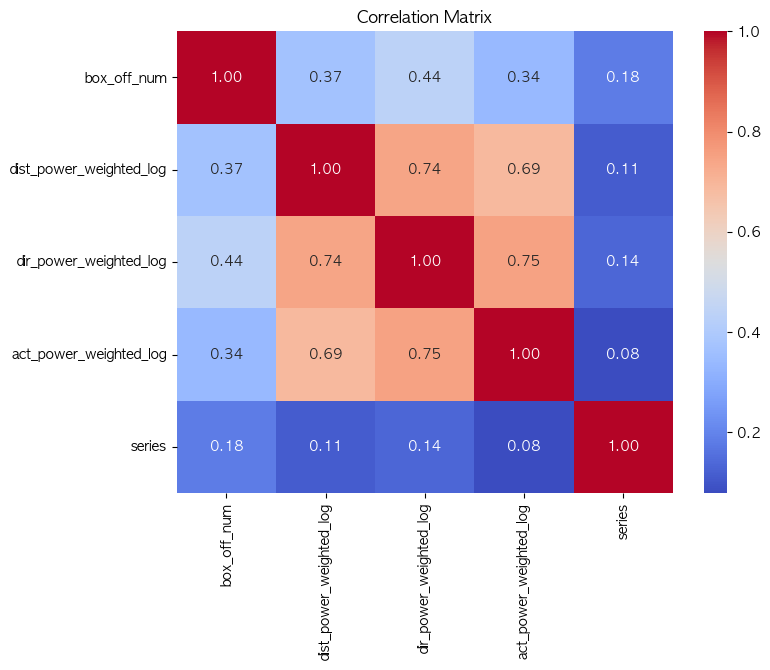

In [136]:
correlation_matrix_numeric = final_data[['box_off_num', 'dist_power_weighted_log', 'dir_power_weighted_log','act_power_weighted_log','series']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

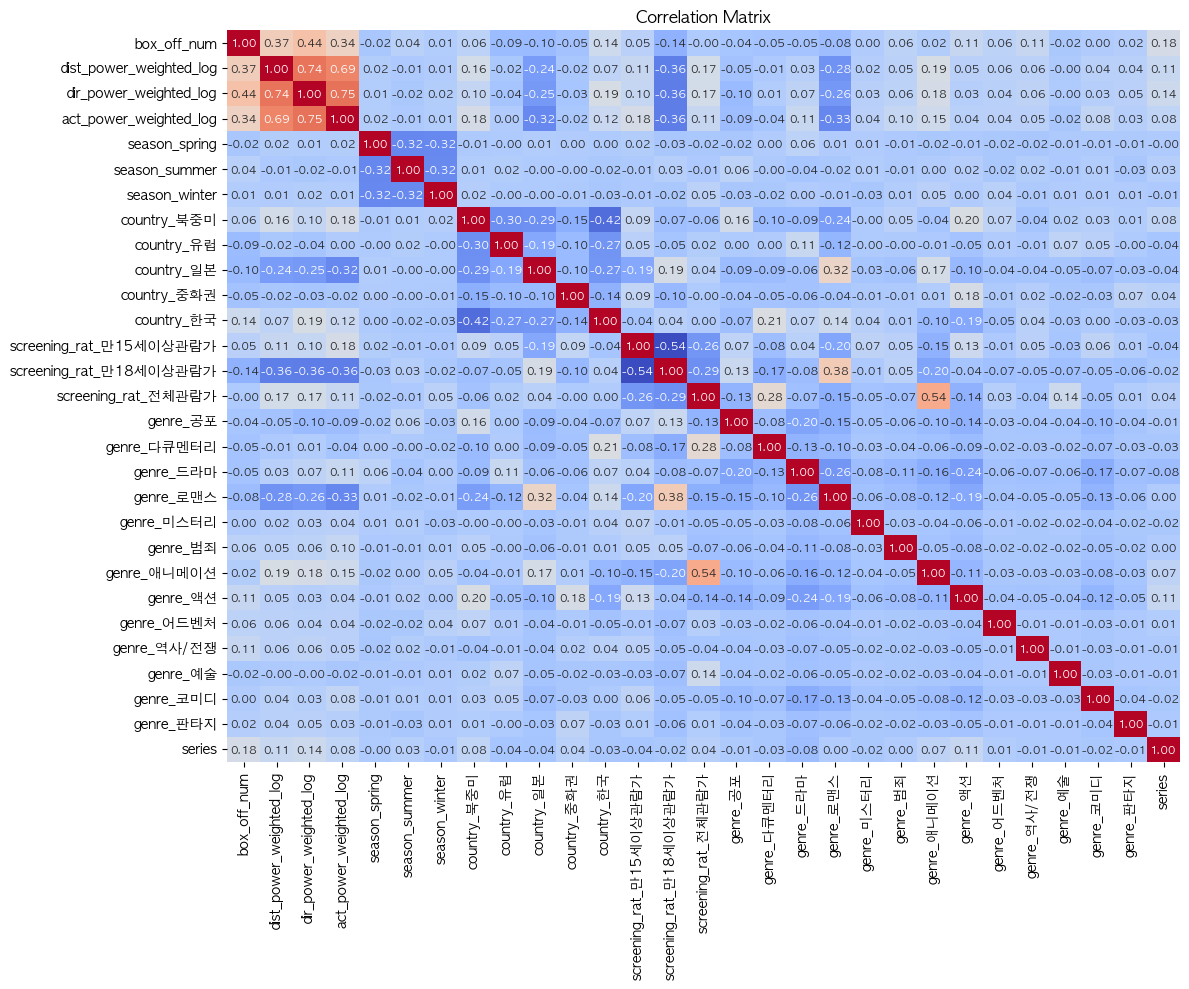

In [137]:
correlation_matrix = final_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, cbar=False)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [138]:
from scipy.stats import pearsonr
independent_vars = ['box_off_num', 'season_spring', 'season_summer', 'season_winter',
       'country_북중미', 'country_유럽', 'country_일본', 'country_중화권', 'country_한국',
       'screening_rat_만15세이상관람가', 'screening_rat_만18세이상관람가',
       'screening_rat_전체관람가', 'genre_공포', 'genre_다큐멘터리', 'genre_드라마',
       'genre_로맨스', 'genre_미스터리', 'genre_범죄', 'genre_애니메이션', 'genre_액션',
       'genre_어드벤처', 'genre_역사/전쟁', 'genre_예술', 'genre_코미디', 'genre_판타지',
       'dist_power_weighted_log', 'dir_power_weighted_log',
       'act_power_weighted_log','series']

for var in independent_vars:
    corr, p_value = pearsonr(final_data['box_off_num'], final_data[var])
    print(f"변수: {var}, 상관계수: {corr}, p-value: {p_value}")
    
    if p_value < 0.05:
        print(f"{var}와 관객수 간의 상관관계는 통계적으로 유의합니다.")
    else:
        print(f"{var}와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.")


변수: box_off_num, 상관계수: 1.0, p-value: 0.0
box_off_num와 관객수 간의 상관관계는 통계적으로 유의합니다.
변수: season_spring, 상관계수: -0.02451393131766079, p-value: 0.035177925548402954
season_spring와 관객수 간의 상관관계는 통계적으로 유의합니다.
변수: season_summer, 상관계수: 0.039974167524930534, p-value: 0.0005913582252912083
season_summer와 관객수 간의 상관관계는 통계적으로 유의합니다.
변수: season_winter, 상관계수: 0.011881705484355763, p-value: 0.3073532771327012
season_winter와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.
변수: country_북중미, 상관계수: 0.05800880145649595, p-value: 6.109388649097953e-07
country_북중미와 관객수 간의 상관관계는 통계적으로 유의합니다.
변수: country_유럽, 상관계수: -0.09313267490887962, p-value: 1.0709251641411864e-15
country_유럽와 관객수 간의 상관관계는 통계적으로 유의합니다.
변수: country_일본, 상관계수: -0.09701914617000763, p-value: 6.564737918338601e-17
country_일본와 관객수 간의 상관관계는 통계적으로 유의합니다.
변수: country_중화권, 상관계수: -0.05264730993349574, p-value: 6.009334561575888e-06
country_중화권와 관객수 간의 상관관계는 통계적으로 유의합니다.
변수: country_한국, 상관계수: 0.14200798453249086, p-value: 1.4475226712461954e-34
country_한국와 관객수 간의 상관관계는 통계적으로 유

변수: season_winter, 상관계수: 0.011881705484355763, p-value: 0.3073532771327012
season_winter와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.

변수: screening_rat_전체관람가, 상관계수: -0.002541097203835453, p-value: 0.8271910131772628
screening_rat_전체관람가와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.

변수: genre_미스터리, 상관계수: 0.0037318382336206813, p-value: 0.7485114693017986
genre_미스터리와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.

변수: genre_애니메이션, 상관계수: 0.018277441611944646, p-value: 0.11633529251023476
genre_애니메이션와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.

변수: genre_예술, 상관계수: -0.02166477560662682, p-value: 0.06268266093093577
genre_예술와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.

변수: genre_코미디, 상관계수: 0.0034059191137619294, p-value: 0.7698257710422419
genre_코미디와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.

변수: genre_판타지, 상관계수: 0.02066796556623206, p-value: 0.07577063542453444
genre_판타지와 관객수 간의 상관관계는 통계적으로 유의하지 않습니다.

##### 상관계수가 높은 변수 탑 10개 선택

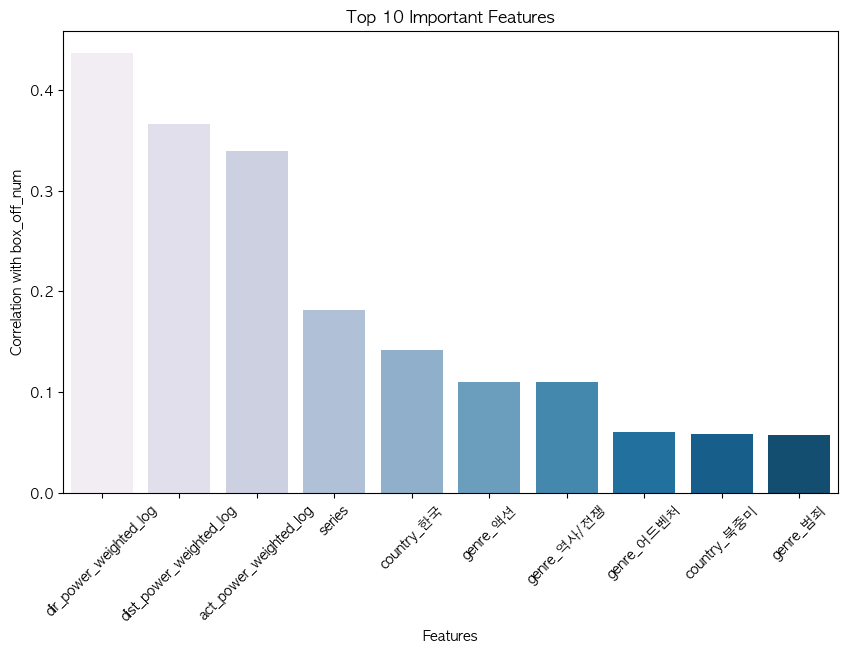

In [139]:
top_features = correlation_matrix['box_off_num'].sort_values(ascending=False)[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.index, y=top_features.values, palette='PuBu')
plt.title('Top 10 Important Features')
plt.xlabel('Features')
plt.ylabel('Correlation with box_off_num')
plt.xticks(rotation=45)
plt.show()

## 5. modeling

### 5.1 모델 간 성능 비교

본 프로젝트에서는 데이터를 훈련용(Training)과 시험용 (Test) 비율을 8:2로 나누어 선정하였다. 

더미 인코딩을 해준 범주형 변수를 제외한, 수치형 변수만 로버스트 스케일링 후 

성능 향상을 위한 K-fold 교차 검증을 하였고,

[ 'Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Theil-Sen Regression', 'Random Forest', 'Gradient Boosting, 'MLP Regressor', 'XGBoost' ] 모델의 성능을 R2 스코어, mae, mse, rmse로 비교 분석하여 평가하였다.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor #as xgb

In [141]:
import os

base_dir = "/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data"

# 2010-2019년
file_path_2010_2019 = os.path.join(base_dir, "2010-2019년_data/final_data.xlsx")

# 2024년
file_path_2024_preprocessed = os.path.join(base_dir, "2024년_data/2024_preprocessed_data.xlsx")
file_path_2024_title = os.path.join(base_dir, "2024년_data/2024_data_title.xlsx")
file_path_2024_answer = os.path.join(base_dir, "2024년_data/2024_data_answer.xlsx")

# 2023년
file_path_2023_preprocessed = os.path.join(base_dir, "2023년_data/2023_preprocessed_data.xlsx")
file_path_2023_title = os.path.join(base_dir, "2023년_data/2023_data_title.xlsx")
file_path_2023_answer = os.path.join(base_dir, "2023년_data/2023_data_answer.xlsx")

# 2019년
file_path_2019_preprocessed = os.path.join(base_dir, "2019년_data/2019_preprocessed_data.xlsx")
file_path_2019_title = os.path.join(base_dir, "2019년_data/2019_data_title.xlsx")
file_path_2019_answer = os.path.join(base_dir, "2019년_data/2019_data_answer.xlsx")

# 데이터 불러오기
df = pd.read_excel(file_path_2010_2019)

data_2024 = pd.read_excel(file_path_2024_preprocessed)
data_2024_title = pd.read_excel(file_path_2024_title)
data_2024_answer = pd.read_excel(file_path_2024_answer)

data_2023 = pd.read_excel(file_path_2023_preprocessed)
data_2023_title = pd.read_excel(file_path_2023_title)
data_2023_answer = pd.read_excel(file_path_2023_answer)

data_2019 = pd.read_excel(file_path_2019_preprocessed)
data_2019_title = pd.read_excel(file_path_2019_title)
data_2019_answer = pd.read_excel(file_path_2019_answer)

In [142]:
df = pd.read_excel(file_path_2010_2019)

# 특성과 타겟 변수 분리
X = df.drop(['box_off_num'], axis=1)
y = df['box_off_num']

# 숫자형 변수와 범주형 변수 분리
numeric_columns = ['dist_power_weighted_log', 'dir_power_weighted_log', 'act_power_weighted_log']
categorical_columns = ['season_spring', 'season_summer', 'season_winter', 'country_북중미', 'country_유럽', 'country_일본',
                       'country_중화권', 'country_한국', 'screening_rat_만15세이상관람가', 'screening_rat_만18세이상관람가',
                       'screening_rat_전체관람가', 'genre_공포', 'genre_다큐멘터리', 'genre_드라마', 'genre_로맨스',
                       'genre_미스터리', 'genre_범죄', 'genre_애니메이션', 'genre_액션', 'genre_어드벤처', 'genre_역사/전쟁',
                       'genre_예술', 'genre_코미디', 'genre_판타지','series']

numeric_variables = X[numeric_columns]
categorical_variables = X[categorical_columns]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 변수 스케일링
scaler = RobustScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train[numeric_variables.columns])
X_test_numeric_scaled = scaler.transform(X_test[numeric_variables.columns])

# 스케일링된 수치형 변수와 원본 범주형 변수를 다시 합침
X_train_scaled = np.hstack((X_train_numeric_scaled, X_train[categorical_variables.columns].values))
X_test_scaled = np.hstack((X_test_numeric_scaled, X_test[categorical_variables.columns].values))

##### K-Fold 교차 검증 이후 성능 평가

In [143]:
# 모델 리스트
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Theil-Sen Regression': TheilSenRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=1000),
    'XGBoost': XGBRegressor(random_state=42)
}

# 각 모델의 성능 저장을 위한 딕셔너리
performance_metrics = {name: {'r2': [], 'mae': [], 'mse': [], 'rmse': []} for name in models.keys()}

# K-fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증
for train_index, val_index in kf.split(X_train_scaled):
    X_kf_train, X_kf_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    for name, model in models.items():
        model.fit(X_kf_train, y_kf_train)
        y_val_pred = model.predict(X_kf_val)
        r2 = r2_score(y_kf_val, y_val_pred)
        mae = mean_absolute_error(y_kf_val, y_val_pred)
        mse = mean_squared_error(y_kf_val, y_val_pred)
        rmse = np.sqrt(mse)
        performance_metrics[name]['r2'].append(r2)
        performance_metrics[name]['mae'].append(mae)
        performance_metrics[name]['mse'].append(mse)
        performance_metrics[name]['rmse'].append(rmse)

# 각 모델의 성능 지표 평균 계산
average_performance = {name: {metric: np.mean(scores) for metric, scores in metrics.items()} 
                       for name, metrics in performance_metrics.items()}

# 교차 검증 결과 출력
cv_results_df = pd.DataFrame(average_performance).T
print("교차 검증 성능 지표 평균:")
print(cv_results_df)

# 테스트 세트 결과 출력
final_performance = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    final_performance[name] = {
        'r2': r2_score(y_test, y_test_pred),
        'mae': mean_absolute_error(y_test, y_test_pred),
        'mse': mean_squared_error(y_test, y_test_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }

# 테스트 세트 결과 출력
test_results_df = pd.DataFrame(final_performance).T
print("\n테스트 세트 성능 지표:")
print(test_results_df)


교차 검증 성능 지표 평균:
                            r2            mae           mse          rmse
Linear Regression     0.248213  429905.723470  8.187259e+11  9.018477e+05
Ridge Regression      0.248377  429624.124505  8.185372e+11  9.017503e+05
Lasso Regression      0.248215  429901.520727  8.187242e+11  9.018468e+05
Theil-Sen Regression  0.160233  300495.826415  9.134890e+11  9.530727e+05
Random Forest         0.689331  141524.280107  3.407963e+11  5.784152e+05
Gradient Boosting     0.666596  155688.324170  3.637426e+11  5.994793e+05
MLP Regressor         0.069915  284774.546845  1.010628e+12  1.002774e+06
XGBoost               0.627662  154396.927775  4.072144e+11  6.315455e+05

테스트 세트 성능 지표:
                            r2            mae           mse          rmse
Linear Regression     0.244599  457890.605131  9.864492e+11  9.932015e+05
Ridge Regression      0.244724  457670.900213  9.862857e+11  9.931192e+05
Lasso Regression      0.244600  457886.934940  9.864480e+11  9.932009e+05
Theil-S

##### 성능 비교 결과 시각화

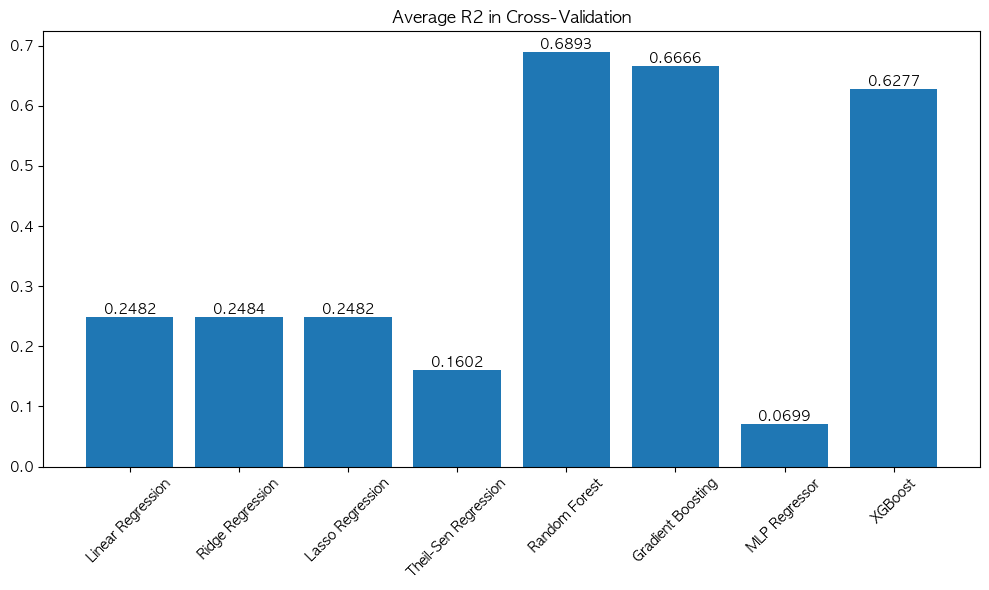

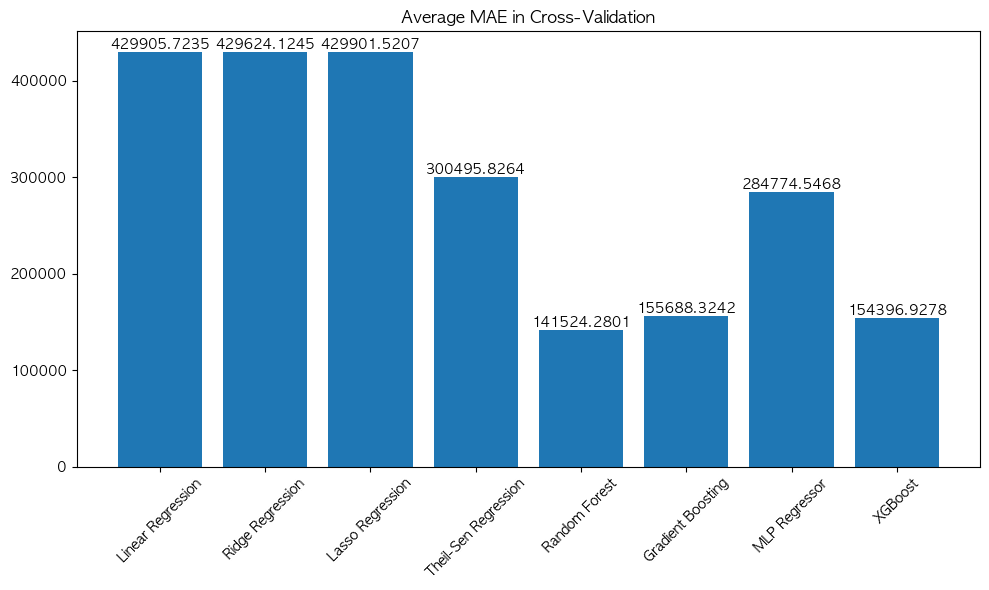

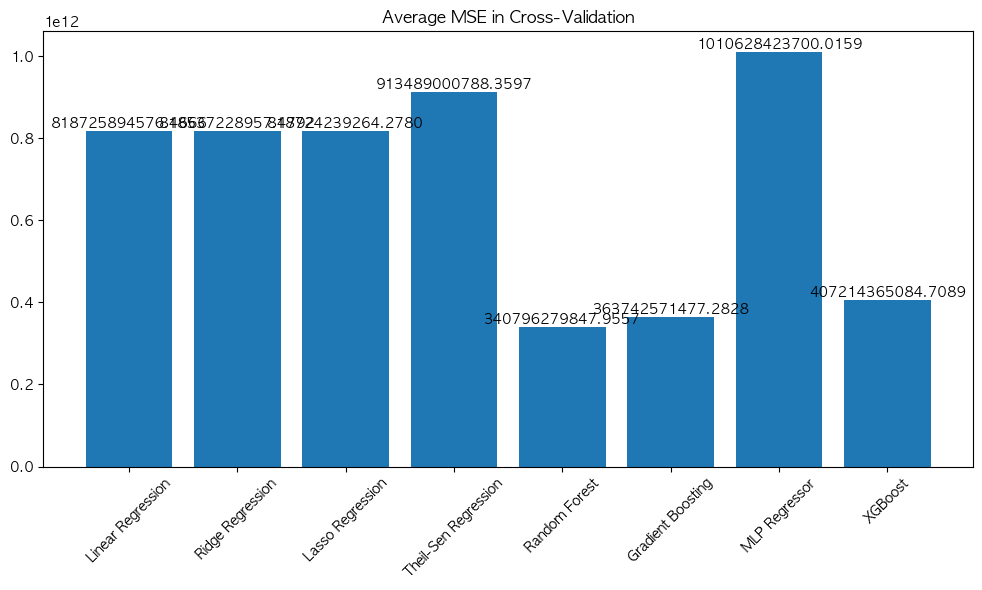

In [144]:
metrics = ['r2', 'mae', 'mse']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    values = cv_results_df[metric]
    plt.bar(cv_results_df.index, values)
    plt.title(f'Average {metric.upper()} in Cross-Validation')
    plt.xticks(rotation=45)
    
    for i, value in enumerate(values):
        plt.text(i, value, f'{value:.4f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

### 5.2 RandomForest

최종적으로 성능이 가장 좋았던 RandomForestRegressor 모델을 선택하였다.

랜덤 포레스트 방법은 기존의 의사 결정 나무 방법 을 합치면서 배깅(Bagging)을 적용하고 분할 변수를 임의로 선택하게 하여 다양성을 증가시킨 앙상블(Ensemble) 모델이다. 

앙상블 모델을 통해 과적합(Over Fitting)을 방지하고 분류기의 성능을 향상시킬 수 있기 때문에 랜덤 포레스트를 적용하였다.


In [145]:
df = pd.read_excel(file_path_2010_2019)

X = df.drop(['box_off_num'], axis=1)
y = df['box_off_num']

numeric_columns = ['dist_power_weighted_log', 'dir_power_weighted_log', 'act_power_weighted_log']
categorical_columns = ['season_spring', 'season_summer', 'season_winter', 'country_북중미', 'country_유럽', 'country_일본',
                       'country_중화권', 'country_한국', 'screening_rat_만15세이상관람가', 'screening_rat_만18세이상관람가',
                       'screening_rat_전체관람가', 'genre_공포', 'genre_다큐멘터리', 'genre_드라마', 'genre_로맨스',
                       'genre_미스터리', 'genre_범죄', 'genre_애니메이션', 'genre_액션', 'genre_어드벤처', 'genre_역사/전쟁',
                       'genre_예술', 'genre_코미디', 'genre_판타지','series']

numeric_variables = X[numeric_columns]
categorical_variables = X[categorical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train[numeric_variables.columns])
X_test_numeric_scaled = scaler.transform(X_test[numeric_variables.columns])

X_train_scaled = np.hstack((X_train_numeric_scaled, X_train[categorical_variables.columns].values))
X_test_scaled = np.hstack((X_test_numeric_scaled, X_test[categorical_variables.columns].values))

rf_model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
for train_index, val_index in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_model.fit(X_tr, y_tr)
    y_pred = rf_model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)

mean_r2_score = np.mean(r2_scores)
mean_rmse_score = np.mean(rmse_scores)
print(f'Mean R2 Score from 5-Fold CV: {mean_r2_score:.4f}')
print(f'Mean RMSE from 5-Fold CV: {mean_rmse_score:.4f}')

rf_model.fit(X_train_scaled, y_train)

y_test_pred = rf_model.predict(X_test_scaled)

test_r2_score = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'R2 Score on Test Set: {test_r2_score:.4f}')
print(f'RMSE on Test Set: {test_rmse:.4f}')

Mean R2 Score from 5-Fold CV: 0.6893
Mean RMSE from 5-Fold CV: 578415.2446
R2 Score on Test Set: 0.7843
RMSE on Test Set: 530768.5500


과적합 되지 않았다. 괜찮은 성능이다.

##### 주요 변수 선정

In [146]:
rf_model.fit(X_train_scaled, y_train)
importance = rf_model.feature_importances_

importance_sorted = sorted(zip(X.columns, importance), key=lambda x: -x[1])

for feat, imp in importance_sorted:
    print(f"Variable: {feat}, Importance: {imp}")

Variable: dir_power_weighted_log, Importance: 0.5682822624174727
Variable: act_power_weighted_log, Importance: 0.27180186205032225
Variable: dist_power_weighted_log, Importance: 0.039494048122975425
Variable: screening_rat_만18세이상관람가, Importance: 0.021031826992227054
Variable: season_summer, Importance: 0.011695384972110204
Variable: genre_액션, Importance: 0.00954104628397854
Variable: screening_rat_만15세이상관람가, Importance: 0.008820598513966802
Variable: genre_코미디, Importance: 0.008498261665398304
Variable: season_winter, Importance: 0.00838098790210713
Variable: screening_rat_전체관람가, Importance: 0.0066718219949623144
Variable: genre_드라마, Importance: 0.005910285060243045
Variable: genre_애니메이션, Importance: 0.005130984626252089
Variable: series, Importance: 0.005042884034626556
Variable: genre_어드벤처, Importance: 0.004750893331004512
Variable: season_spring, Importance: 0.004704727759221705
Variable: country_한국, Importance: 0.004059525721890156
Variable: country_북중미, Importance: 0.0039225396843

dir_power_weighted_log: 감독의 영향력이 가장 큰 것으로 나타났습니다. 영화의 감독은 영화의 성공에 중요한 역할을 할 수 있음을 시사합니다.

act_power_weighted_log: 배우의 영향력이 높은 변수입니다. 주연 배우나 조연 배우의 인기와 연기력이 영화의 성공에 영향을 미칠 수 있습니다.

dist_power_weighted_log: 배급사의 영향력은 중요하지만 상대적으로 작은 것으로 나타났습니다. 배급사가 영화의 성공에 어느 정도 영향을 미칠 수 있지만, 다른 변수들에 비해 상대적으로 덜 중요합니다.

screening_rat_만18세이상관람가: 만 18세 이상 관람가 영화일수록 중요한 변수입니다. 이는 해당 연령층의 시청자들이 영화에 더 관심을 가지거나, 해당 연령층의 시청자들이 더 많을 수 있다는 것을 시사할 수 있습니다.

season_summer, season_winter, genre_코미디, screening_rat_만15세이상관람가: 이들 변수들은 중요한 역할을 하지만, 상대적으로 dir_power_weighted_log나 act_power_weighted_log만큼의 중요성은 갖지 않습니다. 그러나 여전히 영화의 성공에 영향을 미칠 수 있는 변수들로 해석할 수 있습니다.

### 5.3 new 영화 관객수 예측

#### 5.3.1 2024년 영화 관객수 예측

In [147]:
common_columns = X.columns.intersection(data_2024.columns)
X_2024_filtered = data_2024[common_columns]

for col in X.columns:
    if col not in X_2024_filtered.columns:
        X_2024_filtered[col] = 0

numeric_variables_2024 = X_2024_filtered[numeric_variables.columns]
categorical_variables_2024 = X_2024_filtered[categorical_variables.columns]

numeric_variables_scaled_2024 = scaler.transform(numeric_variables_2024)
X_2024 = np.hstack((numeric_variables_scaled_2024, categorical_variables_2024.values))

predicted_box_off_num_2024 = rf_model.predict(X_2024)

data_2024['predicted_box_off_num'] = predicted_box_off_num_2024

predicted_data_2024 = data_2024[['predicted_box_off_num']]

merged_data_2024 = pd.concat([data_2024_title, predicted_data_2024, data_2024_answer[['actual_box_off_num']]], axis=1)

merged_data_2024.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2024년_data/rf_2024_predicted_data.xlsx", index=False)

r2_2024 = r2_score(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])
rmse_2024 = np.sqrt(mean_squared_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num']))
mae_2024 = mean_absolute_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])

print(f'R2 Score on 2024 Data: {r2_2024:.4f}')
print(f'RMSE on 2024 Data: {rmse_2024:.4f}')
print(f'MAE on 2024 Data: {mae_2024:.4f}')


R2 Score on 2024 Data: 0.1382
RMSE on 2024 Data: 1218985.9203
MAE on 2024 Data: 319960.4937


지표가 좋지 않았다

모델의 성능 저하에 대한 몇 가지 일반적인 원인
1. 데이터 분포 변화
원인: 2010-2019년과 2023년 사이에 데이터 분포가 달라질 수 있습니다. 영화 산업의 트렌드, 관객의 선호도, 외부 요인(예: COVID-19 팬데믹) 등이 데이터 분포에 영향을 줄 수 있습니다.
해결책: 2023년 데이터의 분포를 분석하고, 2010-2019년 데이터와 비교하여 차이를 확인합니다. 데이터 분포가 많이 다르다면, 새로운 트렌드에 맞게 모델을 업데이트해야 할 수도 있습니다.
2. 외부 요인
원인: 2023년에 특정한 외부 요인들이 관객수에 영향을 미쳤을 수 있습니다. 예를 들어, 팬데믹, 경제 변화, 경쟁 영화의 개봉 등.
해결책: 외부 요인을 설명할 수 있는 추가 변수를 모델에 포함시킵니다. 예를 들어, 특정 년도의 경제 지표나 팬데믹 기간 등을 포함시킬 수 있습니다.
3. 모델 과적합
원인: 모델이 과거 데이터에 너무 맞추어져 있어 새로운 데이터에 대한 일반화 능력이 부족할 수 있습니다.
해결책: 모델의 복잡도를 줄이거나 규제(Regularization)를 추가하여 과적합을 방지합니다.
4. 데이터 전처리 문제
원인: 2023년 데이터에 적용된 전처리 과정이 과거 데이터와 다를 수 있습니다.
해결책: 전처리 과정을 철저히 검토하여 일관되게 적용되었는지 확인합니다. 특히 로그 변환, 스케일링 등의 과정이 일관되게 적용되었는지 확인합니다.
5. 하이퍼파라미터 튜닝
원인: 2010-2019년 데이터에 대해 최적화된 하이퍼파라미터가 2023년 데이터에는 적합하지 않을 수 있습니다.
해결책: 2023년 데이터를 포함한 교차 검증을 통해 하이퍼파라미터를 다시 튜닝합니다.
6. 피처 중요도 및 선택
원인: 2023년 데이터에 중요한 영향을 미치는 피처가 과거 데이터와 다를 수 있습니다.
해결책: 피처 중요도를 다시 평가하고, 필요하다면 새로운 피처를 추가하거나 기존 피처를 제거합니다.


#### 5.3.2 2023년 영화 관객수 예측

In [148]:
common_columns = X.columns.intersection(data_2023.columns)
X_2023_filtered = data_2023[common_columns]

for col in X.columns:
    if col not in X_2023_filtered.columns:
        X_2023_filtered[col] = 0

numeric_variables_2023 = X_2023_filtered[numeric_variables.columns]
categorical_variables_2023 = X_2023_filtered[categorical_variables.columns]

numeric_variables_scaled_2023 = scaler.transform(numeric_variables_2023)
X_2023 = np.hstack((numeric_variables_scaled_2023, categorical_variables_2023.values))

predicted_box_off_num_2023 = rf_model.predict(X_2023)

data_2023['predicted_box_off_num'] = predicted_box_off_num_2023

predicted_data_2023 = data_2023[['predicted_box_off_num']]

merged_data_2023 = pd.concat([data_2023_title, predicted_data_2023, data_2023_answer[['actual_box_off_num']]], axis=1)

merged_data_2023.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2023년_data/rf_2023_predicted_data.xlsx", index=False)

r2_2023 = r2_score(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])
rmse_2023 = np.sqrt(mean_squared_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num']))
mae_2023 = mean_absolute_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])

print(f'R2 Score on 2023 Data: {r2_2023:.4f}')
print(f'RMSE on 2023 Data: {rmse_2023:.4f}')
print(f'MAE on 2023 Data: {mae_2023:.4f}')


R2 Score on 2023 Data: -0.0121
RMSE on 2023 Data: 986012.4342
MAE on 2023 Data: 309755.9543


마찬가지로 좋지 않았다.

#### 5.4 하이퍼파라미터 조정

##### 현재 랜덤포레스트 파라미터

In [149]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


##### 최적의 하이퍼파라미터 찾기

In [150]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=0)

# 모델 훈련
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적의 하이퍼파라미터로 모델 초기화
best_params = grid_search.best_params_
rf_model_optimized = RandomForestRegressor(**best_params, random_state=42)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


##### 하이퍼파라미터 튜닝 후 성능 평가

In [151]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_model_optimized.fit(X_tr, y_tr)
    y_pred = rf_model_optimized.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)

mean_r2_score = np.mean(r2_scores)
mean_rmse_score = np.mean(rmse_scores)
print(f'Mean R2 Score from 5-Fold CV: {mean_r2_score:.4f}')
print(f'Mean RMSE from 5-Fold CV: {mean_rmse_score:.4f}')

rf_model_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_model_optimized.fit(X_train_scaled, y_train)

y_test_pred_optimized = rf_model_optimized.predict(X_test_scaled)
test_r2_score_optimized = r2_score(y_test, y_test_pred_optimized)
test_rmse_optimized = np.sqrt(mean_squared_error(y_test, y_test_pred_optimized))

print(f'Optimized R2 Score on Test Set: {test_r2_score_optimized:.4f}')
print(f'Optimized RMSE on Test Set: {test_rmse_optimized:.4f}')

Mean R2 Score from 5-Fold CV: 0.7050
Mean RMSE from 5-Fold CV: 564179.0751
Optimized R2 Score on Test Set: 0.7537
Optimized RMSE on Test Set: 567082.3753


#### 5.4.1 하이퍼파라미터 튜닝 후 2024년 영화 관객수 예측

In [152]:
common_columns = X.columns.intersection(data_2024.columns)
X_2024_filtered = data_2024[common_columns]

for col in X.columns:
    if col not in X_2024_filtered.columns:
        X_2024_filtered[col] = 0

numeric_variables_2024 = X_2024_filtered[numeric_variables.columns]
categorical_variables_2024 = X_2024_filtered[categorical_variables.columns]

numeric_variables_scaled_2024 = scaler.transform(numeric_variables_2024)
X_2024 = np.hstack((numeric_variables_scaled_2024, categorical_variables_2024.values))

predicted_box_off_num_2024_optimized = rf_model_optimized.predict(X_2024)

data_2024['predicted_box_off_num'] = predicted_box_off_num_2024_optimized

predicted_data_2024 = data_2024[['predicted_box_off_num']]

merged_data_2024 = pd.concat([data_2024_title, predicted_data_2024, data_2024_answer[['actual_box_off_num']]], axis=1)

merged_data_2024.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2024년_data/rf_2024_predicted_data_optimized.xlsx", index=False)

r2_2024_optimized = r2_score(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])
rmse_2024_optimized = np.sqrt(mean_squared_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num']))
mae_2024_optimized = mean_absolute_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])

print(f'Optimized R2 Score on 2024 Data: {r2_2024_optimized:.4f}')
print(f'Optimized RMSE on 2024 Data: {rmse_2024_optimized:.4f}')
print(f'Optimized MAE on 2024 Data: {mae_2024_optimized:.4f}')


Optimized R2 Score on 2024 Data: 0.1377
Optimized RMSE on 2024 Data: 1219304.9565
Optimized MAE on 2024 Data: 381486.6495


#### 5.4.2 하이퍼파라미터 튜닝 후 2023년 영화 관객수 예측

In [153]:
common_columns = X.columns.intersection(data_2023.columns)
X_2023_filtered = data_2023[common_columns]

for col in X.columns:
    if col not in X_2023_filtered.columns:
        X_2023_filtered[col] = 0

numeric_variables_2023 = X_2023_filtered[numeric_variables.columns]
categorical_variables_2023 = X_2023_filtered[categorical_variables.columns]

numeric_variables_scaled_2023 = scaler.transform(numeric_variables_2023)

X_2023 = np.hstack((numeric_variables_scaled_2023, categorical_variables_2023.values))

predicted_box_off_num_2023_optimized = rf_model_optimized.predict(X_2023)

data_2023['predicted_box_off_num'] = predicted_box_off_num_2023_optimized

predicted_data_2023 = data_2023[['predicted_box_off_num']]

merged_data_2023 = pd.concat([data_2023_title, predicted_data_2023, data_2023_answer[['actual_box_off_num']]], axis=1)

merged_data_2023.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2023년_data/rf_2023_predicted_data_optimized.xlsx", index=False)

r2_2023_optimized = r2_score(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])
rmse_2023_optimized = np.sqrt(mean_squared_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num']))
mae_2023_optimized = mean_absolute_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])

print(f'Optimized R2 Score on 2023 Data: {r2_2023_optimized:.4f}')
print(f'Optimized RMSE on 2023 Data: {rmse_2023_optimized:.4f}')
print(f'Optimized MAE on 2023 Data: {mae_2023_optimized:.4f}')

Optimized R2 Score on 2023 Data: 0.1040
Optimized RMSE on 2023 Data: 927706.1819
Optimized MAE on 2023 Data: 307404.4486


조금 나아지긴 하였다.

#### 5.4.2 하이퍼파라미터 튜닝 후 2019년 영화 관객수를 예측

In [154]:
common_columns = X.columns.intersection(data_2019.columns)
X_2019_filtered = data_2019[common_columns]

for col in X.columns:
    if col not in X_2019_filtered.columns:
        X_2019_filtered[col] = 0

numeric_variables_2019 = X_2019_filtered[numeric_variables.columns]
categorical_variables_2019 = X_2019_filtered[categorical_variables.columns]

numeric_variables_scaled_2019 = scaler.transform(numeric_variables_2019)
X_2019 = np.hstack((numeric_variables_scaled_2019, categorical_variables_2019.values))

predicted_box_off_num_2019_optimized = rf_model_optimized.predict(X_2019)

data_2019['predicted_box_off_num'] = predicted_box_off_num_2019_optimized

predicted_data_2019 = data_2019[['predicted_box_off_num']]

merged_data_2019 = pd.concat([data_2019_title, predicted_data_2019, data_2019_answer[['actual_box_off_num']]], axis=1)

merged_data_2019.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2019년_data/rf_2019_predicted_data_optimized.xlsx", index=False)

r2_2019_optimized = r2_score(merged_data_2019['actual_box_off_num'], merged_data_2019['predicted_box_off_num'])
rmse_2019_optimized = np.sqrt(mean_squared_error(merged_data_2019['actual_box_off_num'], merged_data_2019['predicted_box_off_num']))
mae_2019_optimized = mean_absolute_error(merged_data_2019['actual_box_off_num'], merged_data_2019['predicted_box_off_num'])

print(f'Optimized R2 Score on 2019 Data: {r2_2019_optimized:.4f}')
print(f'Optimized RMSE on 2019 Data: {rmse_2019_optimized:.4f}')
print(f'Optimized MAE on 2019 Data: {mae_2019_optimized:.4f}')

Optimized R2 Score on 2019 Data: 0.9300
Optimized RMSE on 2019 Data: 353137.2520
Optimized MAE on 2019 Data: 86216.9239


훈련 데이터에 2019년 데이터가 있어서 그런지, 성능은 가장 좋았다.

2010-2019년 데이터에 train셋이 과적합 된거 같다.

### 5.5 다른 모델 비교

#### 5.5.1 xgboost

##### xgboost 성능평가

In [155]:
xgb_model = XGBRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
for train_index, val_index in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    xgb_model.fit(X_tr, y_tr)
    y_pred = xgb_model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)

mean_r2_score = np.mean(r2_scores)
mean_rmse_score = np.mean(rmse_scores)
print(f'Mean R2 Score from 5-Fold CV: {mean_r2_score:.4f}')
print(f'Mean RMSE from 5-Fold CV: {mean_rmse_score:.4f}')

xgb_model.fit(X_train_scaled, y_train)

y_test_pred = xgb_model.predict(X_test_scaled)
test_r2_score = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'R2 Score on Test Set: {test_r2_score:.4f}')
print(f'RMSE on Test Set: {test_rmse:.4f}')

Mean R2 Score from 5-Fold CV: 0.6277
Mean RMSE from 5-Fold CV: 631545.5053
R2 Score on Test Set: 0.7024
RMSE on Test Set: 623396.4991


##### xgb, 튜닝전, 2024

In [156]:
common_columns = X.columns.intersection(data_2024.columns)
X_2024_filtered = data_2024[common_columns]

for col in X.columns:
    if col not in X_2024_filtered.columns:
        X_2024_filtered[col] = 0

numeric_variables_2024 = X_2024_filtered[numeric_variables.columns]
categorical_variables_2024 = X_2024_filtered[categorical_variables.columns]

numeric_variables_scaled_2024 = scaler.transform(numeric_variables_2024)
X_2024 = np.hstack((numeric_variables_scaled_2024, categorical_variables_2024.values))

predicted_box_off_num_2024 = xgb_model.predict(X_2024)

data_2024['predicted_box_off_num'] = predicted_box_off_num_2024

predicted_data_2024 = data_2024[['predicted_box_off_num']]

merged_data_2024 = pd.concat([data_2024_title, predicted_data_2024, data_2024_answer[['actual_box_off_num']]], axis=1)

merged_data_2024.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2024년_data/xgb_2024_predicted_data.xlsx", index=False)

r2_2024 = r2_score(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])
rmse_2024 = np.sqrt(mean_squared_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num']))
mae_2024 = mean_absolute_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])

print(f'R2 Score on 2024 Data: {r2_2024:.4f}')
print(f'RMSE on 2024 Data: {rmse_2024:.4f}')
print(f'MAE on 2024 Data: {mae_2024:.4f}')

R2 Score on 2024 Data: 0.1207
RMSE on 2024 Data: 1231321.7549
MAE on 2024 Data: 346419.6204


##### xgb, 튜닝전, 2023

In [157]:
common_columns = X.columns.intersection(data_2023.columns)
X_2023_filtered = data_2023[common_columns]

for col in X.columns:
    if col not in X_2023_filtered.columns:
        X_2023_filtered[col] = 0

numeric_variables_2023 = X_2023_filtered[numeric_variables.columns]
categorical_variables_2023 = X_2023_filtered[categorical_variables.columns]

numeric_variables_scaled_2023 = scaler.transform(numeric_variables_2023)
X_2023 = np.hstack((numeric_variables_scaled_2023, categorical_variables_2023.values))

predicted_box_off_num_2023 = xgb_model.predict(X_2023)

data_2023['predicted_box_off_num'] = predicted_box_off_num_2023

predicted_data_2023 = data_2023[['predicted_box_off_num']]

merged_data_2023 = pd.concat([data_2023_title, predicted_data_2023, data_2023_answer[['actual_box_off_num']]], axis=1)

merged_data_2023.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2023년_data/xgb_2023_predicted_data.xlsx", index=False)

r2_2023 = r2_score(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])
rmse_2023 = np.sqrt(mean_squared_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num']))
mae_2023 = mean_absolute_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])

print(f'R2 Score on 2023 Data: {r2_2023:.4f}')
print(f'RMSE on 2023 Data: {rmse_2023:.4f}')
print(f'MAE on 2023 Data: {mae_2023:.4f}')


R2 Score on 2023 Data: 0.0450
RMSE on 2023 Data: 957782.3443
MAE on 2023 Data: 307236.2449


##### xgb 하이퍼파라미터 튜닝

In [158]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               cv=5, n_jobs=-1, scoring='r2', verbose=0)

grid_search_xgb.fit(X_train, y_train)

print(f'Best Parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best R2 Score from Grid Search for XGBoost: {grid_search_xgb.best_score_}')

best_params_xgb = grid_search_xgb.best_params_
xgb_model_optimized = XGBRegressor(**best_params_xgb, random_state=42)

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 1.0}
Best R2 Score from Grid Search for XGBoost: 0.6855004488379579


##### 하이퍼파라미터 튜닝 후 성능 평가

In [159]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
for train_index, val_index in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    xgb_model_optimized.fit(X_tr, y_tr)
    y_pred = xgb_model_optimized.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)

mean_r2_score = np.mean(r2_scores)
mean_rmse_score = np.mean(rmse_scores)
print(f'Mean R2 Score from 5-Fold CV: {mean_r2_score:.4f}')
print(f'Mean RMSE from 5-Fold CV: {mean_rmse_score:.4f}')

xgb_model_optimized.fit(X_train_scaled, y_train)

y_test_pred_optimized = xgb_model_optimized.predict(X_test_scaled)
test_r2_score_optimized = r2_score(y_test, y_test_pred_optimized)
test_rmse_optimized = np.sqrt(mean_squared_error(y_test, y_test_pred_optimized))

print(f'Optimized R2 Score on Test Set: {test_r2_score_optimized:.4f}')
print(f'Optimized RMSE on Test Set: {test_rmse_optimized:.4f}')

Mean R2 Score from 5-Fold CV: 0.6944
Mean RMSE from 5-Fold CV: 574330.4325
Optimized R2 Score on Test Set: 0.7706
Optimized RMSE on Test Set: 547290.7500


##### 하이퍼파라미터 튜닝 후 xgb로 2024년 관객 수 예측

In [160]:
common_columns = X.columns.intersection(data_2024.columns)
X_2024_filtered = data_2024[common_columns]

for col in X.columns:
    if col not in X_2024_filtered.columns:
        X_2024_filtered[col] = 0

numeric_variables_2024 = X_2024_filtered[numeric_variables.columns]
categorical_variables_2024 = X_2024_filtered[categorical_variables.columns]

numeric_variables_scaled_2024 = scaler.transform(numeric_variables_2024)
X_2024 = np.hstack((numeric_variables_scaled_2024, categorical_variables_2024.values))

predicted_box_off_num_2024_optimized = xgb_model_optimized.predict(X_2024)

data_2024['predicted_box_off_num'] = predicted_box_off_num_2024_optimized

predicted_data_2024 = data_2024[['predicted_box_off_num']]

merged_data_2024 = pd.concat([data_2024_title, predicted_data_2024, data_2024_answer[['actual_box_off_num']]], axis=1)

merged_data_2024.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2024년_data/xgb_2024_predicted_data_optimized.xlsx", index=False)

r2_2024_optimized = r2_score(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])
rmse_2024_optimized = np.sqrt(mean_squared_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num']))
mae_2024_optimized = mean_absolute_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])

print(f'Optimized R2 Score on 2024 Data: {r2_2024_optimized:.4f}')
print(f'Optimized RMSE on 2024 Data: {rmse_2024_optimized:.4f}')
print(f'Optimized MAE on 2024 Data: {mae_2024_optimized:.4f}')

Optimized R2 Score on 2024 Data: 0.2435
Optimized RMSE on 2024 Data: 1142087.6701
Optimized MAE on 2024 Data: 331625.3223


##### 하이퍼파라미터 튜닝 후 xgb로 2023년 관객 수 예측

In [161]:
common_columns = X.columns.intersection(data_2023.columns)
X_2023_filtered = data_2023[common_columns]

for col in X.columns:
    if col not in X_2023_filtered.columns:
        X_2023_filtered[col] = 0

numeric_variables_2023 = X_2023_filtered[numeric_variables.columns]
categorical_variables_2023 = X_2023_filtered[categorical_variables.columns]

numeric_variables_scaled_2023 = scaler.transform(numeric_variables_2023)
X_2023 = np.hstack((numeric_variables_scaled_2023, categorical_variables_2023.values))

predicted_box_off_num_2023_optimized = xgb_model_optimized.predict(X_2023)

data_2023['predicted_box_off_num'] = predicted_box_off_num_2023_optimized

predicted_data_2023 = data_2023[['predicted_box_off_num']]

merged_data_2023 = pd.concat([data_2023_title, predicted_data_2023, data_2023_answer[['actual_box_off_num']]], axis=1)

merged_data_2023.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2023년_data/xgb_2023_predicted_data_optimized.xlsx", index=False)

r2_2023_optimized = r2_score(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])
rmse_2023_optimized = np.sqrt(mean_squared_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num']))
mae_2023_optimized = mean_absolute_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])

print(f'Optimized R2 Score on 2023 Data: {r2_2023_optimized:.4f}')
print(f'Optimized RMSE on 2023 Data: {rmse_2023_optimized:.4f}')
print(f'Optimized MAE on 2023 Data: {mae_2023_optimized:.4f}')

Optimized R2 Score on 2023 Data: 0.0972
Optimized RMSE on 2023 Data: 931219.0183
Optimized MAE on 2023 Data: 316385.4628


비슷한 결과가 나왔다.

#### 5.5.2 GradientBoosting

##### GradientBoosting 성능평가

In [162]:
gbr_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
for train_index, val_index in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    gbr_model.fit(X_tr, y_tr)
    y_pred = gbr_model.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)

mean_r2_score = np.mean(r2_scores)
mean_rmse_score = np.mean(rmse_scores)
print(f'Mean R2 Score from 5-Fold CV: {mean_r2_score:.4f}')
print(f'Mean RMSE from 5-Fold CV: {mean_rmse_score:.4f}')

gbr_model.fit(X_train_scaled, y_train)

y_test_pred = gbr_model.predict(X_test_scaled)
test_r2_score = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'R2 Score on Test Set: {test_r2_score:.4f}')
print(f'RMSE on Test Set: {test_rmse:.4f}')

Mean R2 Score from 5-Fold CV: 0.6666
Mean RMSE from 5-Fold CV: 599479.3061
R2 Score on Test Set: 0.7732
RMSE on Test Set: 544184.0128


##### gbr, 튜닝전, 2024

In [163]:
common_columns = X.columns.intersection(data_2024.columns)
X_2024_filtered = data_2024[common_columns]

for col in X.columns:
    if col not in X_2024_filtered.columns:
        X_2024_filtered[col] = 0

numeric_variables_2024 = X_2024_filtered[numeric_variables.columns]
categorical_variables_2024 = X_2024_filtered[categorical_variables.columns]

numeric_variables_scaled_2024 = scaler.transform(numeric_variables_2024)
X_2024 = np.hstack((numeric_variables_scaled_2024, categorical_variables_2024.values))

predicted_box_off_num_2024 = gbr_model.predict(X_2024)

data_2024['predicted_box_off_num'] = predicted_box_off_num_2024

predicted_data_2024 = data_2024[['predicted_box_off_num']]

merged_data_2024 = pd.concat([data_2024_title, predicted_data_2024, data_2024_answer[['actual_box_off_num']]], axis=1)

merged_data_2024.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2024년_data/gbr_2024_predicted_data.xlsx", index=False)

r2_2024 = r2_score(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])
rmse_2024 = np.sqrt(mean_squared_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num']))
mae_2024 = mean_absolute_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])

print(f'R2 Score on 2024 Data: {r2_2024:.4f}')
print(f'RMSE on 2024 Data: {rmse_2024:.4f}')
print(f'MAE on 2024 Data: {mae_2024:.4f}')

R2 Score on 2024 Data: 0.1932
RMSE on 2024 Data: 1179416.0646
MAE on 2024 Data: 361997.4360


##### gbr, 튜닝전, 2023

In [164]:
common_columns = X.columns.intersection(data_2023.columns)
X_2023_filtered = data_2023[common_columns]

for col in X.columns:
    if col not in X_2023_filtered.columns:
        X_2023_filtered[col] = 0

numeric_variables_2023 = X_2023_filtered[numeric_variables.columns]
categorical_variables_2023 = X_2023_filtered[categorical_variables.columns]

numeric_variables_scaled_2023 = scaler.transform(numeric_variables_2023)
X_2023 = np.hstack((numeric_variables_scaled_2023, categorical_variables_2023.values))

predicted_box_off_num_2023 = gbr_model.predict(X_2023)

data_2023['predicted_box_off_num'] = predicted_box_off_num_2023

predicted_data_2023 = data_2023[['predicted_box_off_num']]

merged_data_2023 = pd.concat([data_2023_title, predicted_data_2023, data_2023_answer[['actual_box_off_num']]], axis=1)

merged_data_2023.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2023년_data/gbr_2023_predicted_data.xlsx", index=False)

r2_2023 = r2_score(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])
rmse_2023 = np.sqrt(mean_squared_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num']))
mae_2023 = mean_absolute_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])

print(f'R2 Score on 2023 Data: {r2_2023:.4f}')
print(f'RMSE on 2023 Data: {rmse_2023:.4f}')
print(f'MAE on 2023 Data: {mae_2023:.4f}')


R2 Score on 2023 Data: 0.1075
RMSE on 2023 Data: 925912.9429
MAE on 2023 Data: 326179.4209


##### gbr 하이퍼파라미터 튜닝

In [165]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr, 
                               cv=5, n_jobs=-1, scoring='r2', verbose=0)

grid_search_gbr.fit(X_train, y_train)

print(f'Best Parameters for Gradient Boosting: {grid_search_gbr.best_params_}')
print(f'Best R2 Score from Grid Search for Gradient Boosting: {grid_search_gbr.best_score_}')

best_params = grid_search_gbr.best_params_
gbr_model_optimized = GradientBoostingRegressor(**best_params, random_state=42)


Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.9}
Best R2 Score from Grid Search for Gradient Boosting: 0.681199543896525


##### 하이퍼파라미터 튜닝 후 성능 평가

In [166]:
gbr_model_optimized.fit(X_train_scaled, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    gbr_model_optimized.fit(X_tr, y_tr)
    y_pred = gbr_model_optimized.predict(X_val)
    
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)

mean_r2_score = np.mean(r2_scores)
mean_rmse_score = np.mean(rmse_scores)
print(f'Mean R2 Score from 5-Fold CV: {mean_r2_score:.4f}')
print(f'Mean RMSE from 5-Fold CV: {mean_rmse_score:.4f}')

gbr_model_optimized.fit(X_train_scaled, y_train)

y_test_pred_optimized = gbr_model_optimized.predict(X_test_scaled)
test_r2_score_optimized = r2_score(y_test, y_test_pred_optimized)
test_rmse_optimized = np.sqrt(mean_squared_error(y_test, y_test_pred_optimized))

print(f'Optimized R2 Score on Test Set: {test_r2_score_optimized:.4f}')
print(f'Optimized RMSE on Test Set: {test_rmse_optimized:.4f}')

Mean R2 Score from 5-Fold CV: 0.6788
Mean RMSE from 5-Fold CV: 588501.5330
Optimized R2 Score on Test Set: 0.7915
Optimized RMSE on Test Set: 521838.0809


##### gbr, 튜닝 후, 2024

In [167]:
common_columns = X.columns.intersection(data_2024.columns)
X_2024_filtered = data_2024[common_columns]

for col in X.columns:
    if col not in X_2024_filtered.columns:
        X_2024_filtered[col] = 0

numeric_variables_2024 = X_2024_filtered[numeric_variables.columns]
categorical_variables_2024 = X_2024_filtered[categorical_variables.columns]

numeric_variables_scaled_2024 = scaler.transform(numeric_variables_2024)
X_2024 = np.hstack((numeric_variables_scaled_2024, categorical_variables_2024.values))

predicted_box_off_num_2024_optimized = gbr_model_optimized.predict(X_2024)

data_2024['predicted_box_off_num'] = predicted_box_off_num_2024_optimized

predicted_data_2024 = data_2024[['predicted_box_off_num']]

merged_data_2024 = pd.concat([data_2024_title, predicted_data_2024, data_2024_answer[['actual_box_off_num']]], axis=1)

merged_data_2024.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2024년_data/gbr_2024_predicted_data_optimized.xlsx", index=False)

r2_2024_optimized = r2_score(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])
rmse_2024_optimized = np.sqrt(mean_squared_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num']))
mae_2024_optimized = mean_absolute_error(merged_data_2024['actual_box_off_num'], merged_data_2024['predicted_box_off_num'])

print(f'Optimized R2 Score on 2024 Data: {r2_2024_optimized:.4f}')
print(f'Optimized RMSE on 2024 Data: {rmse_2024_optimized:.4f}')
print(f'Optimized MAE on 2024 Data: {mae_2024_optimized:.4f}')

Optimized R2 Score on 2024 Data: 0.1989
Optimized RMSE on 2024 Data: 1175264.5393
Optimized MAE on 2024 Data: 319845.7953


##### gbr, 튜닝 후, 2023

In [168]:
common_columns = X.columns.intersection(data_2023.columns)
X_2023_filtered = data_2023[common_columns]

for col in X.columns:
    if col not in X_2023_filtered.columns:
        X_2023_filtered[col] = 0

numeric_variables_2023 = X_2023_filtered[numeric_variables.columns]
categorical_variables_2023 = X_2023_filtered[categorical_variables.columns]

numeric_variables_scaled_2023 = scaler.transform(numeric_variables_2023)
X_2023 = np.hstack((numeric_variables_scaled_2023, categorical_variables_2023.values))

predicted_box_off_num_2023_optimized = gbr_model_optimized.predict(X_2023)

data_2023['predicted_box_off_num'] = predicted_box_off_num_2023_optimized

predicted_data_2023 = data_2023[['predicted_box_off_num']]

merged_data_2023 = pd.concat([data_2023_title, predicted_data_2023, data_2023_answer[['actual_box_off_num']]], axis=1)

merged_data_2023.to_excel("/Users/seojeongmin/Desktop/3-1/데이터사이언스응용/TeamProject/data/2023년_data/gbr_2023_predicted_data_optimized.xlsx", index=False)

r2_2023_optimized = r2_score(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])
rmse_2023_optimized = np.sqrt(mean_squared_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num']))
mae_2023_optimized = mean_absolute_error(merged_data_2023['actual_box_off_num'], merged_data_2023['predicted_box_off_num'])

print(f'Optimized R2 Score on 2023 Data: {r2_2023_optimized:.4f}')
print(f'Optimized RMSE on 2023 Data: {rmse_2023_optimized:.4f}')
print(f'Optimized MAE on 2023 Data: {mae_2023_optimized:.4f}')


Optimized R2 Score on 2023 Data: -0.0027
Optimized RMSE on 2023 Data: 981401.4874
Optimized MAE on 2023 Data: 310992.6005
